In [1]:
library('igraph')
library('pracma')
library('Matrix')
library('resample')
library('dplyr')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:pracma’:

    expm, lu, tril, triu



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# 1. Generating Random Networks

## 1. Create random networks using Erdos-Renyi (ER) model

a) Create undirected random networks with $n=900$ nodes, and the probability $p$ for drawing an edge between two arbitrary vertices 0.002, 0.006, 0.012, 0.045, and 0.1. Plot the degree distributions. What distribution (linear/exponential/gaussian/binomial 
or something else) is observed? Explain why. Also, report the mean and variance o 
the degree distributions and compare them to the theoretical values.

For p = 0.002 
Mean of degree distribution: 1.897778 
Variance of degree distribution: 1.913899 
Theoretical mean: 1.798 
Theoretical variance: 1.794404 



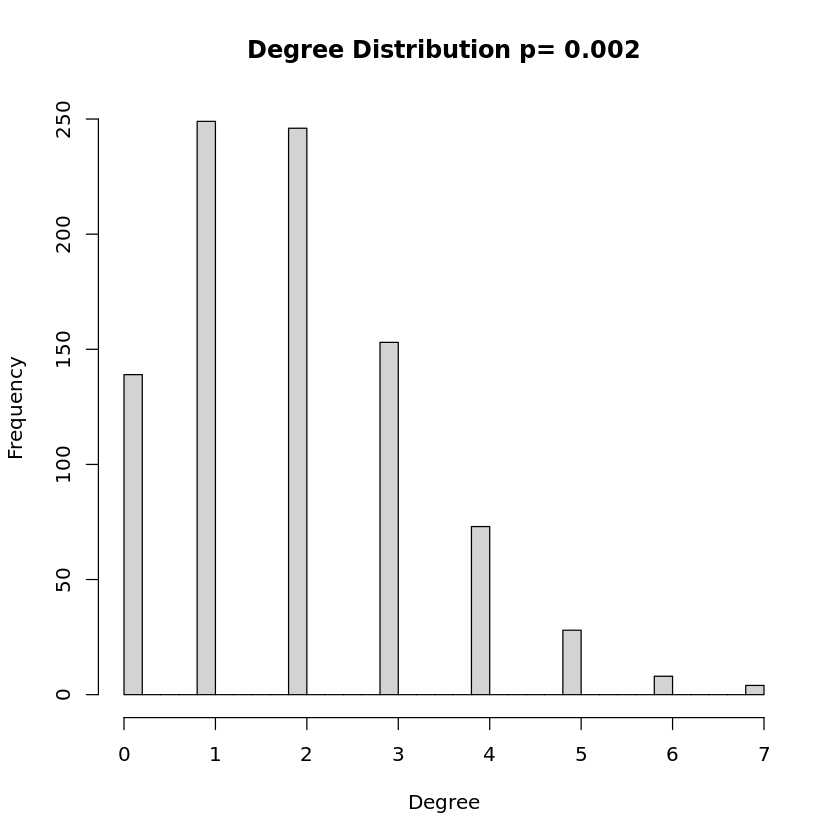

For p = 0.006 
Mean of degree distribution: 5.462222 
Variance of degree distribution: 5.178771 
Theoretical mean: 5.394 
Theoretical variance: 5.361636 



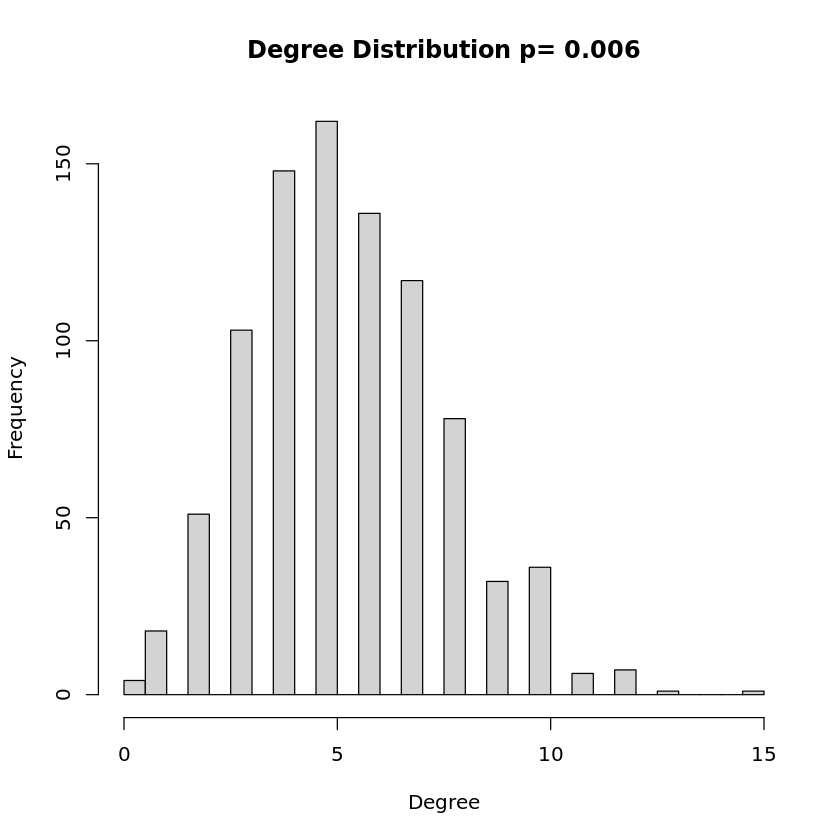

For p = 0.012 
Mean of degree distribution: 10.71556 
Variance of degree distribution: 10.20821 
Theoretical mean: 10.788 
Theoretical variance: 10.65854 



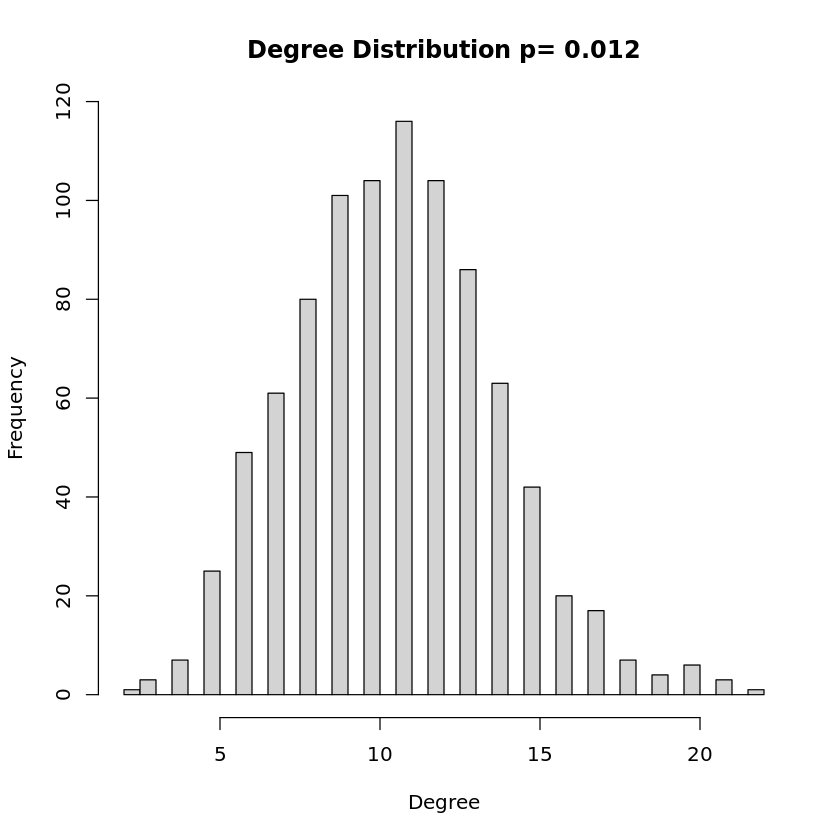

For p = 0.045 
Mean of degree distribution: 40.90889 
Variance of degree distribution: 40.95276 
Theoretical mean: 40.455 
Theoretical variance: 38.63452 



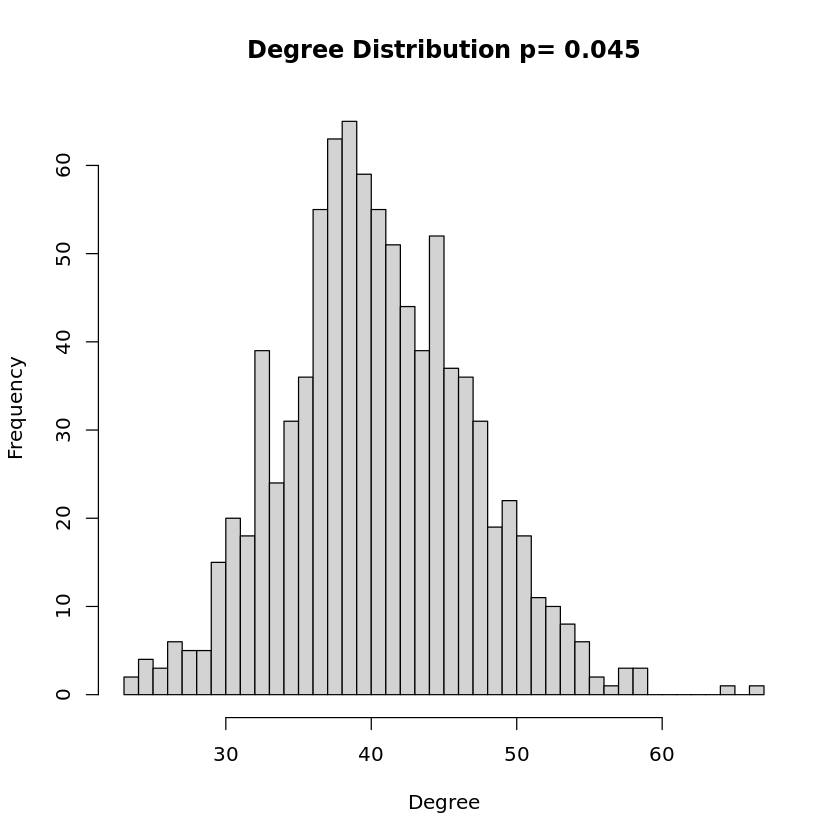

For p = 0.1 
Mean of degree distribution: 90.22889 
Variance of degree distribution: 78.09661 
Theoretical mean: 89.9 
Theoretical variance: 80.91 



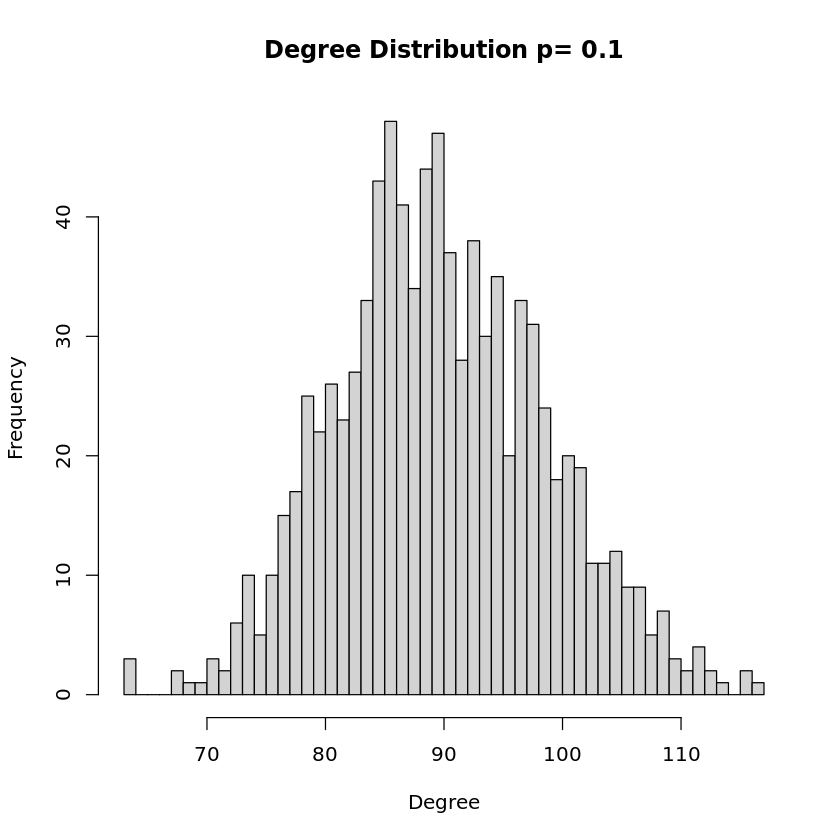

In [2]:
# Probabilities
p_values <- c(0.002, 0.006, 0.012, 0.045, 0.1)
# Number of nodes
n <- 900
# Create graphs, calculate and plot degree distributions, and report metrics
for (p in p_values) {
  g <- erdos.renyi.game(n, p, type='gnp', directed=FALSE)
  deg <- degree(g)
  
  # Plotting the degree distribution
  hist(deg, main=paste('Degree Distribution p=', p), xlab='Degree', ylab='Frequency', breaks=50)
  
  # Calculating mean and variance
  mean_deg <- mean(deg)
  var_deg <- var(deg)
  
  cat("For p =", p, "\n")
  cat("Mean of degree distribution:", mean_deg, "\n")
  cat("Variance of degree distribution:", var_deg, "\n")
  
  # Theoretical mean and variance
  theoretical_mean <- p * (n-1)
  theoretical_var <- p * (1-p) * (n-1)
  
  cat("Theoretical mean:", theoretical_mean, "\n")
  cat("Theoretical variance:", theoretical_var, "\n\n")
}

b) For each $p$ and $n = 900$, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate th 
probability that a generated network is connected. For one instance of the networ s
with th$a$t p, find the giant connected component (GCC) if not connected. What is
the diameter of the GCC?

In [3]:
# 1b
# Parameters
p_values <- c(0.002, 0.006, 0.012, 0.045, 0.1)
n <- 900
num_realizations <- 1000 # Number of realizations for each p to estimate connectivity probability

# Loop through each p value
for (p in p_values) {
  connected_count <- 0
  
  for (i in 1:num_realizations) {
    g <- erdos.renyi.game(n, p, type = "gnp", directed = FALSE)
     
    # Check if the network is connected
    if (is_connected(g)) {
      connected_count <- connected_count + 1
    } 
  }
  print(sprintf("Results for p=%5.3f",p))
  print(sprintf("Probability that the network is connected: %5.3f", connected_count/1000))
    
  # GCC
  g.components <- clusters(g)
  # Get the largest component
  ix <- which.max(g.components$csize)

  g.giant <- induced.subgraph(g, which(g.components$membership == ix))
  print(sprintf("Is the graph connected: %s", is.connected(g)))
  print(sprintf("Number of nodes of the GCC: %d", vcount(g.giant)))
  print(sprintf("Number of Edges of the GCC: %d", ecount(g.giant)))
  print(sprintf("Diameter of the GCC: %5.3f",diameter(g.giant)))
  cat("\n")
}

[1] "Results for p=0.002"
[1] "Probability that the network is connected: 0.000"


Warning message:
“`clusters()` was deprecated in igraph 2.0.0.
ℹ Please use `components()` instead.”
Warning message:
“`induced.subgraph()` was deprecated in igraph 2.0.0.
ℹ Please use `induced_subgraph()` instead.”
Warning message:
“`is.connected()` was deprecated in igraph 2.0.0.
ℹ Please use `is_connected()` instead.”


[1] "Is the graph connected: FALSE"
[1] "Number of nodes of the GCC: 540"
[1] "Number of Edges of the GCC: 588"
[1] "Diameter of the GCC: 26.000"

[1] "Results for p=0.006"
[1] "Probability that the network is connected: 0.017"
[1] "Is the graph connected: FALSE"
[1] "Number of nodes of the GCC: 894"
[1] "Number of Edges of the GCC: 2395"
[1] "Diameter of the GCC: 8.000"

[1] "Results for p=0.012"
[1] "Probability that the network is connected: 0.981"
[1] "Is the graph connected: TRUE"
[1] "Number of nodes of the GCC: 900"
[1] "Number of Edges of the GCC: 4852"
[1] "Diameter of the GCC: 5.000"

[1] "Results for p=0.045"
[1] "Probability that the network is connected: 1.000"
[1] "Is the graph connected: TRUE"
[1] "Number of nodes of the GCC: 900"
[1] "Number of Edges of the GCC: 18024"
[1] "Diameter of the GCC: 3.000"

[1] "Results for p=0.100"
[1] "Probability that the network is connected: 1.000"
[1] "Is the graph connected: TRUE"
[1] "Number of nodes of the GCC: 900"
[1] "Number of E

c) It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of the total network size) is highly nonlinear function of $p$, with interesting properties occuring for values where $p=O(\frac{1}{n})$ and $p=O\frac{\ln(n)}{n}$.  
For $n = 900$, sweep over values of $p$ from 0 to a $p_{max}$ that makes the network almost 
surely connected and create 100 random networks for each$ $p.$ _{pmx}$x should be roughl 
determined by yourself. Then scatter plot the normalized GCC sizes v$s$ p. Plot line e
of the average normalized GCC sizes for ea$c$h p along with the scatter plot.

i. Empirically estimate the value of $p$ where a giant connected component starts to 
emerge (define your criterion of “emergence”)? Do they match with theoretica 
values mentioned or derived in lectures?

ii. Empirically estimate the value of $p$ where the giant connected component takes 
up over 99% of the nodes in almost every experiment.

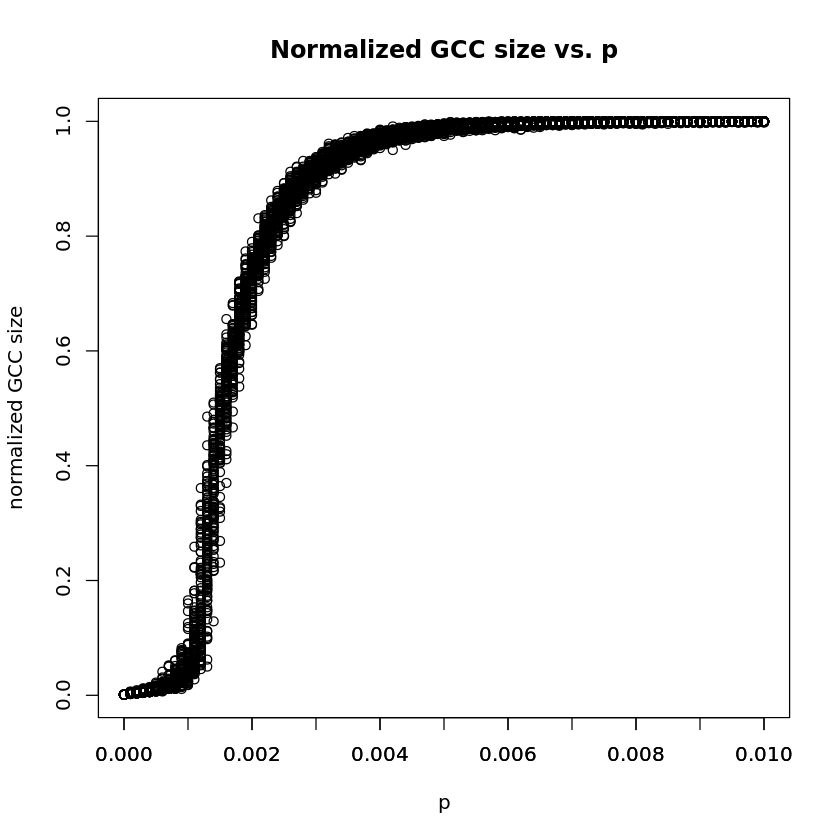

In [4]:
#1c: Normalized GCC
# Scatter plot normalized GCC for 100 random networks for each p. 

p_min = 0
p_max = 0.01
p_step = 0.0001
p_array = seq(p_min,p_max,p_step)
n = 900
num_networks = 100
i = 0

rand_networks = seq(1,num_networks)
len_gcc = length(p_array)*length(rand_networks)
gcc.sizes = vector(mode="numeric", length=len_gcc)
p_plot = rep(p_array, times=1, each=num_networks) # Create 100 networks for each p


for (p in p_array){
    # generate 100 random netwoks 
    for (x in rand_networks ){
        i = i+1
        g = erdos.renyi.game(n, p, type="gnp")
        # GCC
        g.components = clusters(g)
        # Get the largest component
        ix = which.max(g.components$csize)
        # Get the subgraph corresponding to the giant component
        g.giant = induced.subgraph(g, which(g.components$membership == ix))
        gcc.sizes[i] = length(V(g.giant))
        
    }
}
# options(repr.plot.width=10, repr.plot.height=5)
plot(p_plot,gcc.sizes/n,main="Normalized GCC size vs. p",xlab="p",ylab="normalized GCC size")
axis(side=1, at=seq(0,0.01,by=0.001))
lines(gcc.sizes)
# box()

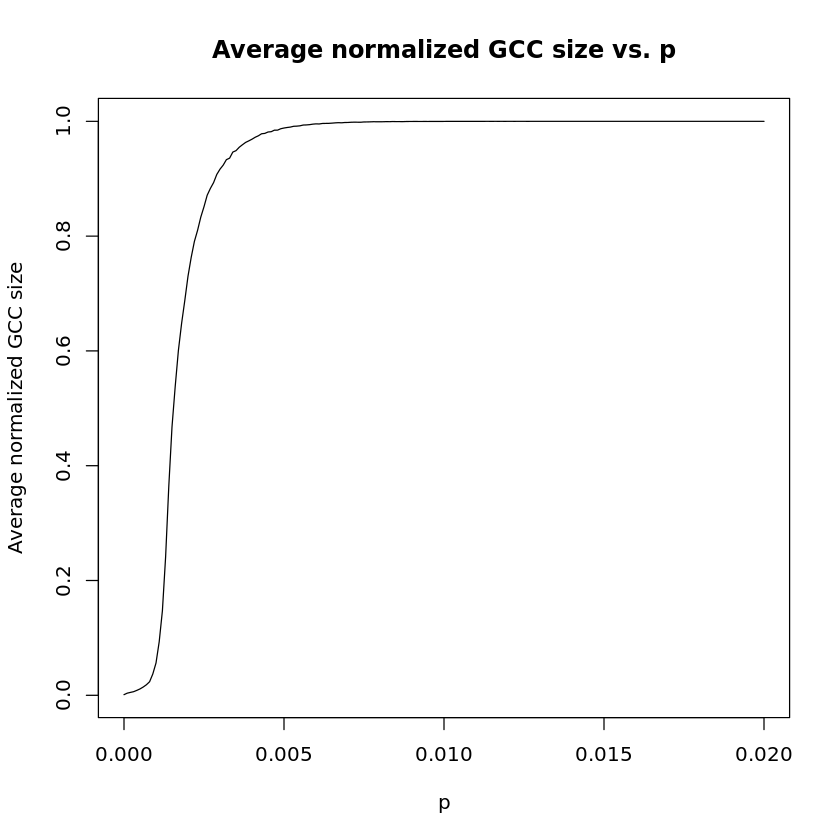

In [5]:
#1c: Mean Normalized GCC
p_min = 0
p_max = 0.02
p_step = 0.0001
p_array = seq(p_min,p_max,p_step)
n = 900
num_networks = 100
i = 0
len_gcc = length(p_array)

rand_networks = seq(1,num_networks)
gcc.sizes = vector(mode="numeric", length=len_gcc)

for (p in p_array){
    i = i+1
    # generate 100 random netwoks 
    gcc.size.sum = 0
    for (x in rand_networks ){
        
        g = erdos.renyi.game(n, p, type="gnp")
        # GCC
        g.components = clusters(g)
        # Get the largest component
        ix = which.max(g.components$csize)
        # Get the subgraph corresponding to the giant component
        g.giant = induced.subgraph(g, which(g.components$membership == ix))
        
        gcc.size.sum = gcc.size.sum + length(V(g.giant))
    }
    
    # find mean value of GCC Size.                           
    gcc.sizes[i] = gcc.size.sum/num_networks

}

plot(p_array,gcc.sizes/n,main="Average normalized GCC size vs. p",xlab="p",ylab="Average normalized GCC size", type="l")

d)

i. Define the average degree of nodes $c = n * p = 0.5$. Sweep over the number of nodes, $n$, ranging from 100 to 10000. PLot the expected size of the GCC of ER networks with $n$ nodes and edge-formation probabilities $p=\frac{c}{n}$, as a funtion of $n$? What trend is observed?

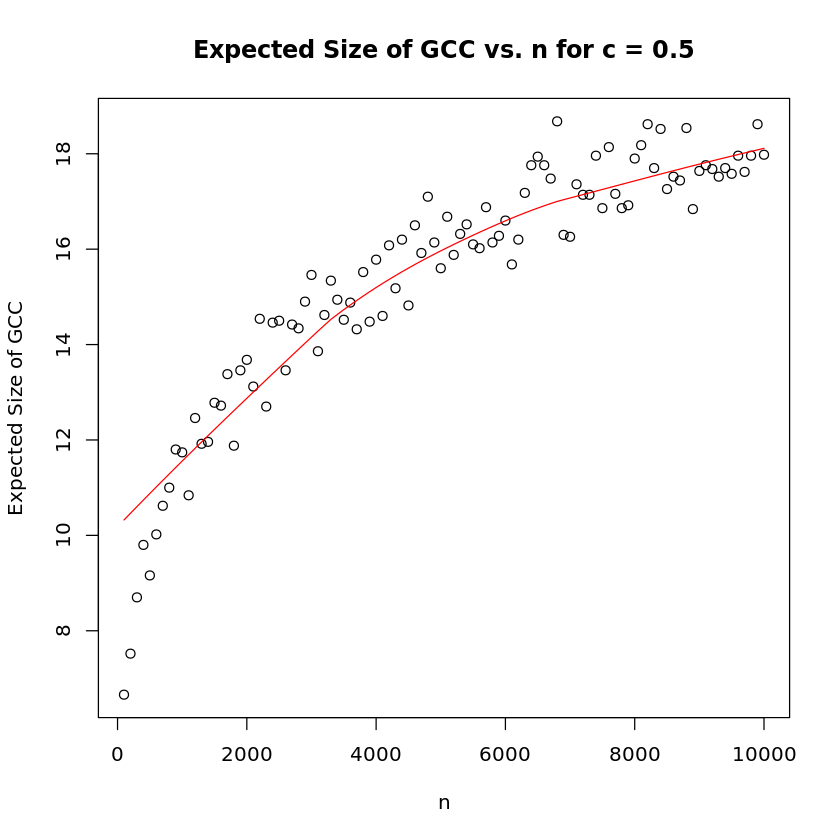

In [6]:
c = 0.5
n_start = 100
n_end = 10000
n_step = 100
range_n = seq(n_start,n_end,n_step)
gcc.sizes = vector(mode="numeric", length=length(range_n))
i = 0
num_networks = 50
rand_networks = seq(1,num_networks)

for (n in range_n){
    i = i+1 
    p = c/n 
    gcc.size.sum = 0 
    
    # average over 50 random networks
    for( a in rand_networks){
        g = erdos.renyi.game(n, p, type="gnp")
        # GCC
        g.components = clusters(g)
        ## Get the largest component
        ix = which.max(g.components$csize)
        # Get the subgraph corresponding to the giant component
        g.giant = induced.subgraph(g, which(g.components$membership == ix))
        
        gcc.size.sum = gcc.size.sum+vcount(g.giant)
        
    }
    
    # add to vector
    gcc.sizes[i] = (gcc.size.sum/num_networks)

}

plot(range_n,gcc.sizes,main= paste("Expected Size of GCC vs. n for c =",c),xlab="n",ylab="Expected Size of GCC")
lines(lowess(range_n,gcc.sizes), col="red")

ii. Repeat the same for $c=1$.

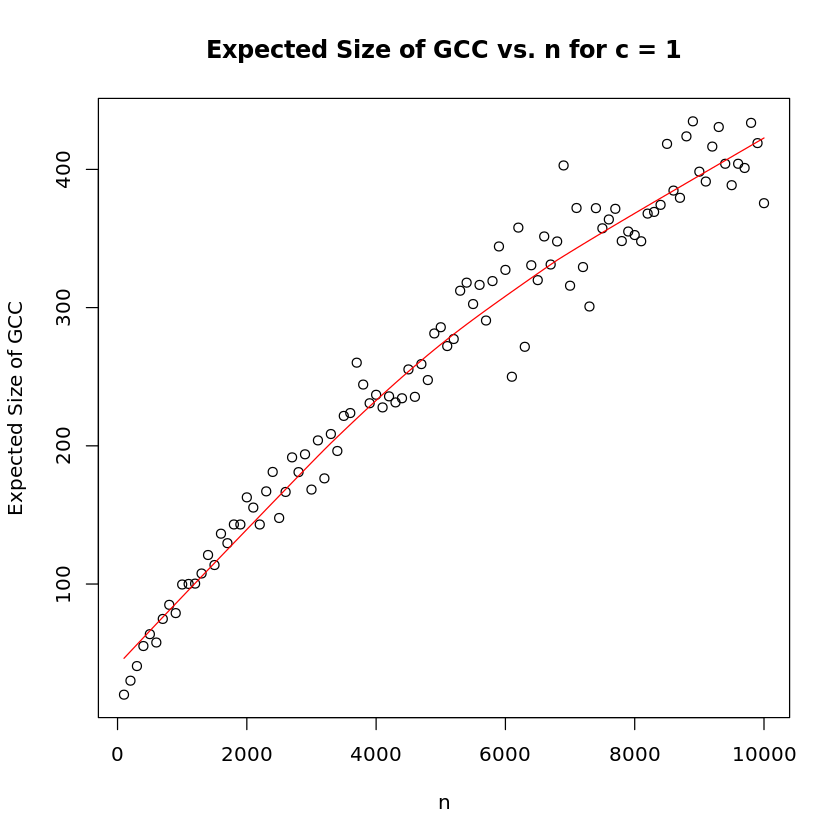

In [7]:
c = 1
n_start = 100
n_end = 10000
n_step = 100
range_n = seq(n_start,n_end,n_step)
gcc.sizes = vector(mode="numeric", length=length(range_n))
i = 0
num_networks = 50
rand_networks = seq(1,num_networks)

for (n in range_n){
    i = i+1 
    p = c/n 
    gcc.size.sum = 0 
    
    # average over 50 random networks
    for( a in rand_networks){
        g = erdos.renyi.game(n, p, type="gnp")
        # GCC
        g.components = clusters(g)
        ## Get the largest component
        ix = which.max(g.components$csize)
        # Get the subgraph corresponding to the giant component
        g.giant = induced.subgraph(g, which(g.components$membership == ix))
        
        gcc.size.sum = gcc.size.sum+vcount(g.giant)
        
    }
    
    # add to vector
    gcc.sizes[i] = (gcc.size.sum/num_networks)

}

plot(range_n,gcc.sizes,main= paste("Expected Size of GCC vs. n for c =",c),xlab="n",ylab="Expected Size of GCC")
lines(lowess(range_n,gcc.sizes), col="red")

iii. Repeate the same for values of $c = 1.15, 1.25, 1.35$, and show the results for these three values in a single plot.

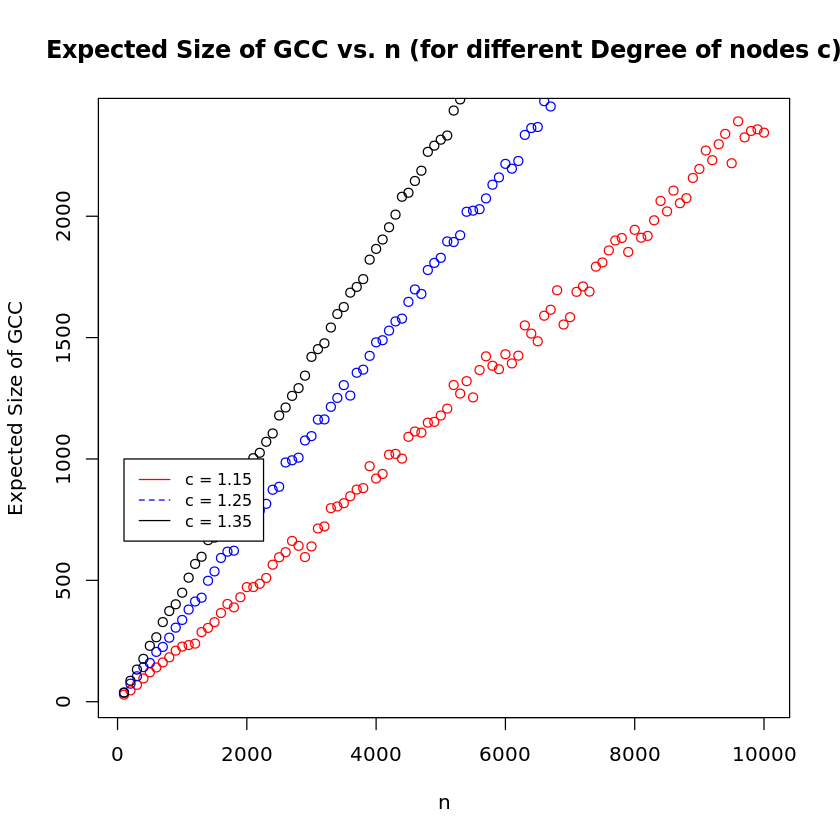

In [8]:
n_start = 100
n_end = 10000
n_step = 100
range_n = seq(n_start,n_end,n_step)
gcc.sizes = vector(mode="numeric", length=length(range_n))
num_networks = 50
rand_networks = seq(1,num_networks)

c = 1.15
i = 0
for (n in range_n){
    i = i+1 
    p = c/n 
    gcc.size.sum = 0 
    
    # average over 50 random networks
    for( a in rand_networks){
        g = erdos.renyi.game(n, p, type="gnp")
        # GCC
        g.components = clusters(g)
        ## Get the largest component
        ix = which.max(g.components$csize)
        # Get the subgraph corresponding to the giant component
        g.giant = induced.subgraph(g, which(g.components$membership == ix))
        
        gcc.size.sum = gcc.size.sum+vcount(g.giant)
        
    }
    
    # add to vector
    gcc.sizes[i] = (gcc.size.sum/num_networks)

}
plot(range_n,gcc.sizes,col='red',main= "Expected Size of GCC vs. n (for different Degree of nodes c)",xlab="n",ylab="Expected Size of GCC")


c = 1.25
i = 0
for (n in range_n){
    i = i+1 
    p = c/n 
    gcc.size.sum = 0 
    
    # average over 50 random networks
    for( a in rand_networks){
        g = erdos.renyi.game(n, p, type="gnp")
        # GCC
        g.components = clusters(g)
        ## Get the largest component
        ix = which.max(g.components$csize)
        # Get the subgraph corresponding to the giant component
        g.giant = induced.subgraph(g, which(g.components$membership == ix))
        
        gcc.size.sum = gcc.size.sum+vcount(g.giant)
        
    }
    
    # add to vector
    gcc.sizes[i] = (gcc.size.sum/num_networks)

}

points(range_n,gcc.sizes,col='blue')


c = 1.35
i = 0
for (n in range_n){
    i = i+1 
    p = c/n 
    gcc.size.sum = 0 
    
    # average over 50 random networks
    for( a in rand_networks){
        g = erdos.renyi.game(n, p, type="gnp")
        # GCC
        g.components = clusters(g)
        ## Get the largest component
        ix = which.max(g.components$csize)
        # Get the subgraph corresponding to the giant component
        g.giant = induced.subgraph(g, which(g.components$membership == ix))
        
        gcc.size.sum = gcc.size.sum+vcount(g.giant)
        
    }
    
    # add to vector
    gcc.sizes[i] = (gcc.size.sum/num_networks)

}

points(range_n,gcc.sizes,col='black')
legend(100, 1000, legend=c("c = 1.15", "c = 1.25","c = 1.35"),
       col=c("red", "blue","black"), lty=1:2, cex=0.8)

iv. What is the relation between the expected GCC size and $n$ in each case?

## 2. Create networks using preferential attachment model

a) Create an undirected network with $n = 1050$ nodes, with preferential attachment model, where each new node attaches to $m = 1$ old nodes. Is such network always connected?

Warning message:
“`barabasi.game()` was deprecated in igraph 2.0.0.
ℹ Please use `sample_pa()` instead.”


Is the network alwasy connected? TRUE 


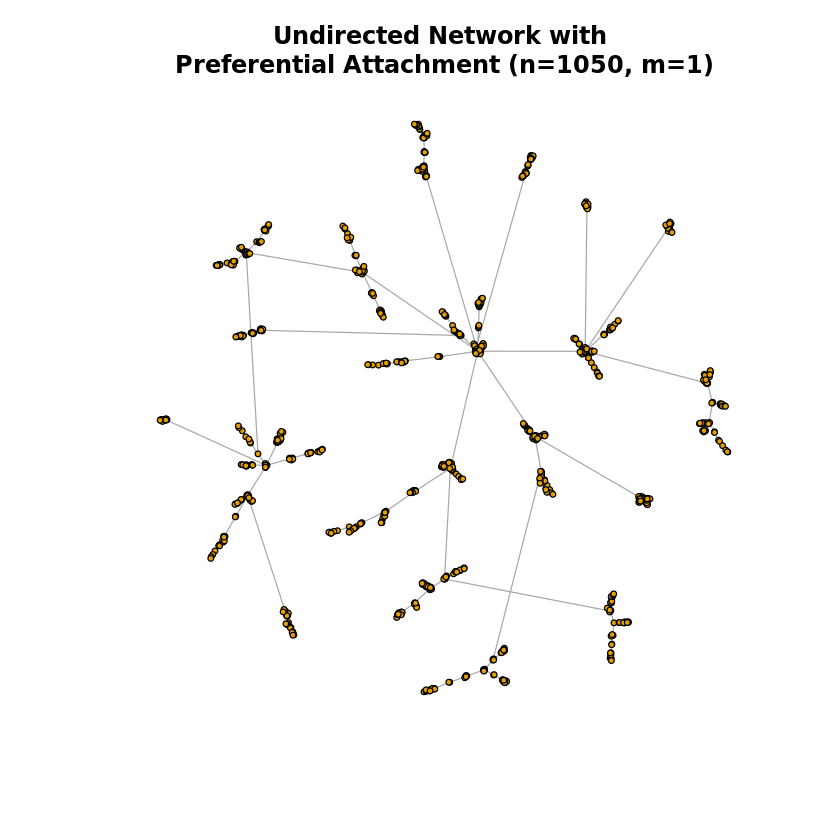

In [9]:
# 2a
n <- 1050 # number of nodes
m <- 1 # Each new node attaches to m old nodes

# Creating the network
g <- barabasi.game(n, m=m, directed=FALSE)

# Check if the network is connected
is_connected <- is_connected(g)
plot(g, vertex.label="", vertex.size=2, main="Undirected Network with \nPreferential Attachment (n=1050, m=1)")
cat("Is the network alwasy connected?", is_connected, "\n")

b) Use fast greedy method to find the community structure. Measure modularity. Define Assortativity. Comptue Assortativity.

In [10]:
# 2b
# Community detection with fast greedy method
communities <- cluster_fast_greedy(g)

# Measure modularity
mod <- modularity(communities)
cat("Modularty of the network:", mod, "\n")

# Compute the degree assortativity 
assortativity  <- assortativity_degree(g)
cat("Degree Assortativity of the network:", assortativity , "\n")

Modularty of the network: 0.9351477 
Degree Assortativity of the network: -0.08301188 


c) Try to generate a larger network with 10500 nodes using the same model. Compute modualirty and assortavity. How is it compared to the smaller network's modularity?

In [11]:
# 2c
n <- 10500 # number of nodes
m <- 1 # Each new node attaches to m old nodes

# Creating the network
g <- barabasi.game(n, m=m, directed=FALSE)

# Check if the network is connected
is_connected <- is_connected(g)

cat("Is the network alwasy connected?", is_connected, "\n")

# Community detection with fast greedy method
communities <- cluster_fast_greedy(g)

# Measure modularity
mod <- modularity(communities)
cat("Modularty of the network:", mod, "\n")

# Compute the degree assortativity 
assortativity  <- assortativity_degree(g)
cat("Degree Assortativity of the network:", assortativity , "\n")

Is the network alwasy connected? TRUE 
Modularty of the network: 0.9786037 
Degree Assortativity of the network: -0.0157461 


d) Plot the degree distribution in a log-log scale for both $n=1050, 10500$, then estimate the slope of the plot using linear regression.

Warning message:
“`degree.distribution()` was deprecated in igraph 2.0.0.
ℹ Please use `degree_distribution()` instead.”


For n =  1050
Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.2248      -2.2827  



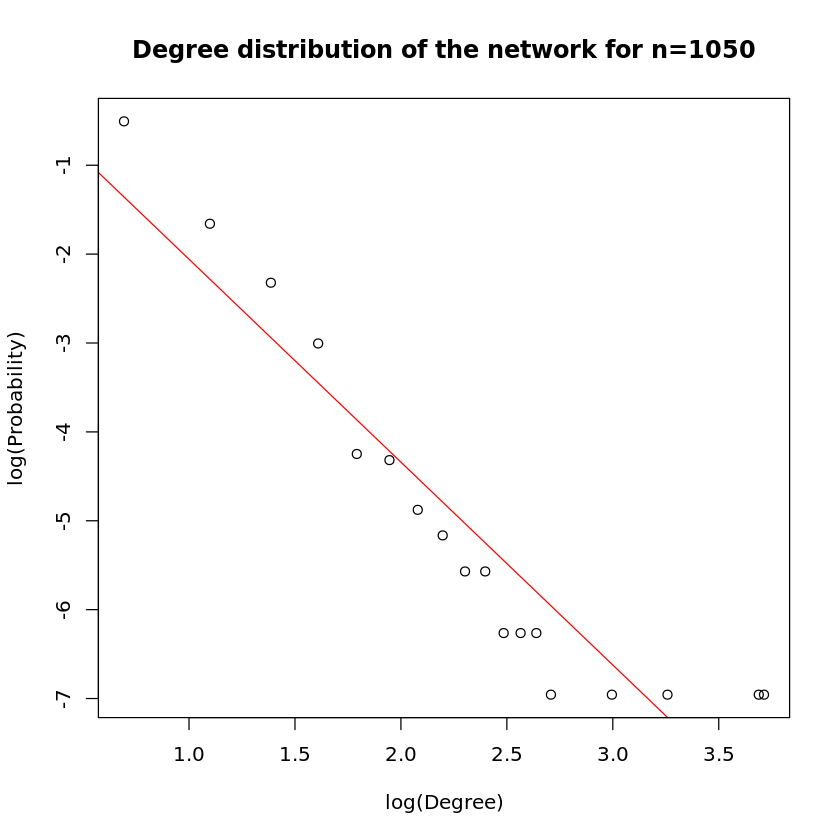

For n =  10500
Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.7918      -2.7735  



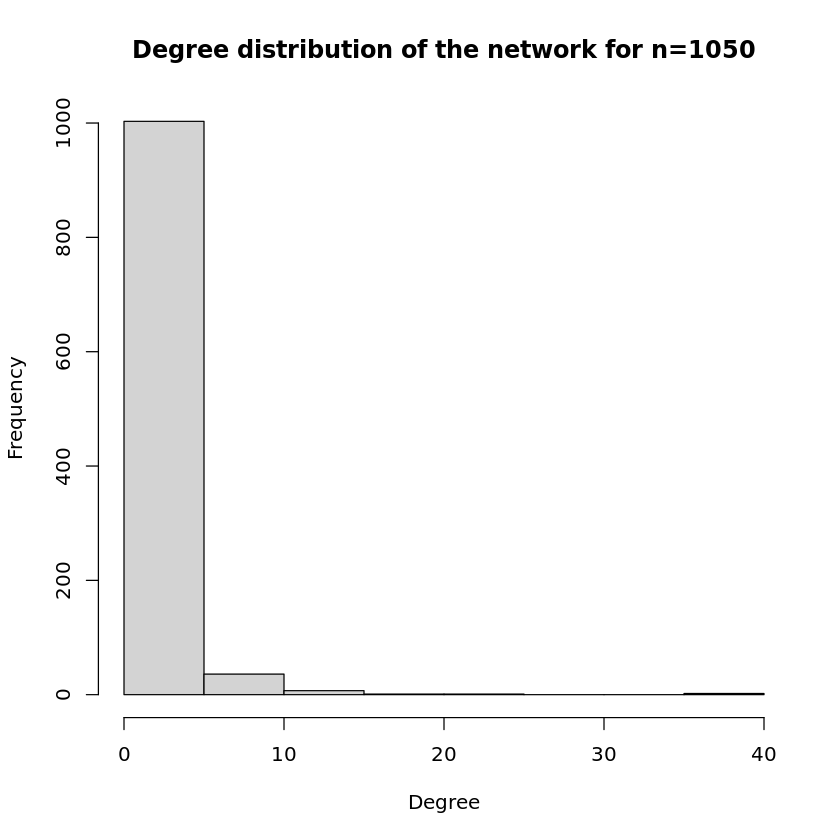

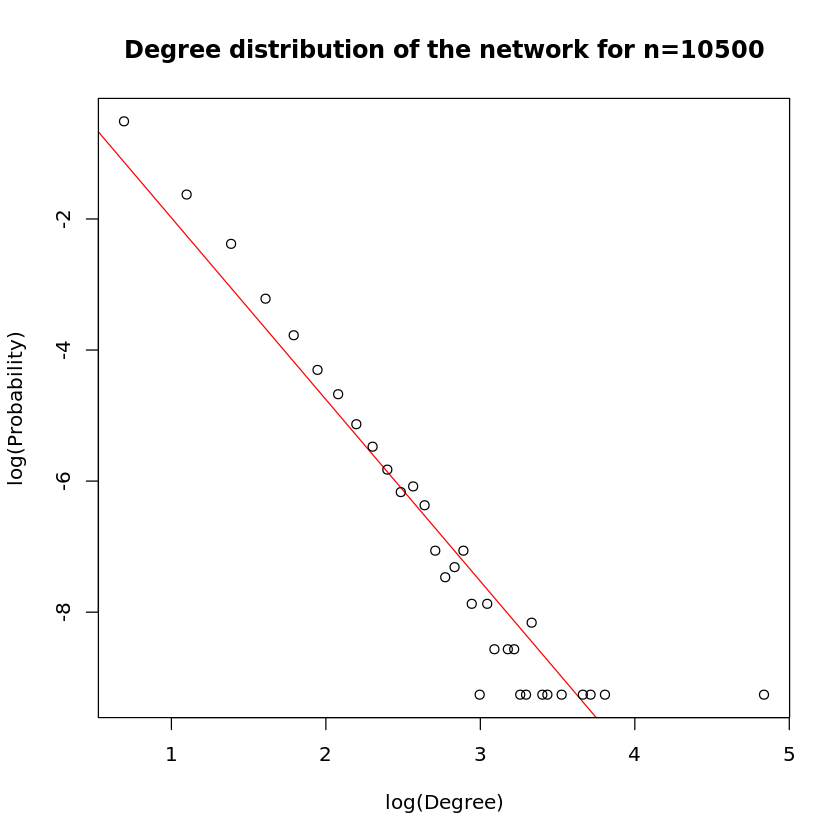

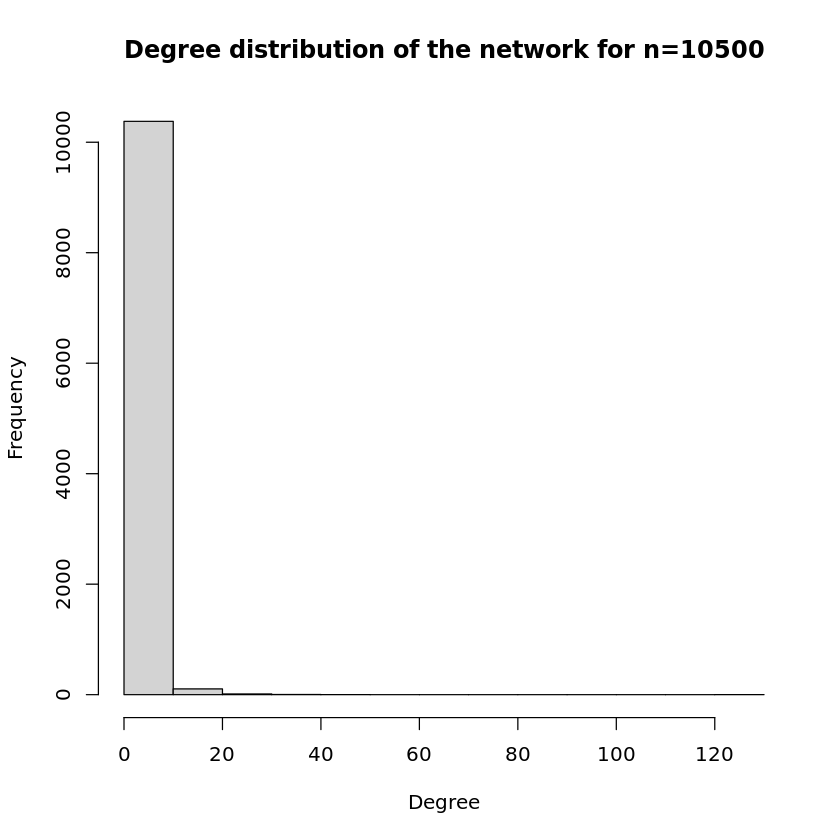

In [12]:
n_array = c(1050, 10500)
m = 1
for (n in n_array) {
    g = barabasi.game(n=n, m=m, directed=FALSE)
    deg_distribution = degree.distribution(g)
    idx = which(deg_distribution != 0, arr.ind=TRUE)
    x = log(seq(1:length(deg_distribution)))[idx]
    y = log(deg_distribution)[idx]

    cat(paste("For n = ", n))

    relation = lm(y ~ x)
    print(relation)
    plot(x,y,abline(relation, col='red'), main=sprintf("Degree distribution of the network for n=%d", n), xlab="log(Degree)", ylab="log(Probability)")
    hist(degree(g), main=sprintf("Degree distribution of the network for n=%d",n), xlab='Degree', ylab="Frequency")
}

e) In the two networks generated in 2(a) and 2(c), perform the following:
Randomly pick a node $i$, and then randomly pick a neighbor $j$ of that node. Plot the degree distribution of nodes $j$ that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
    -0.9952      -1.1895  



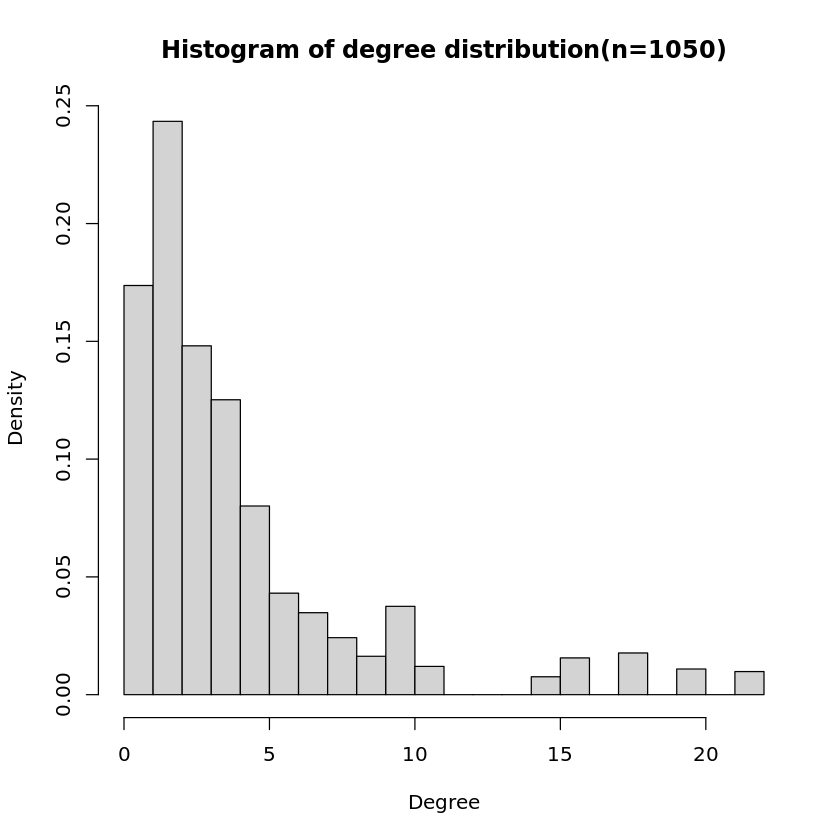

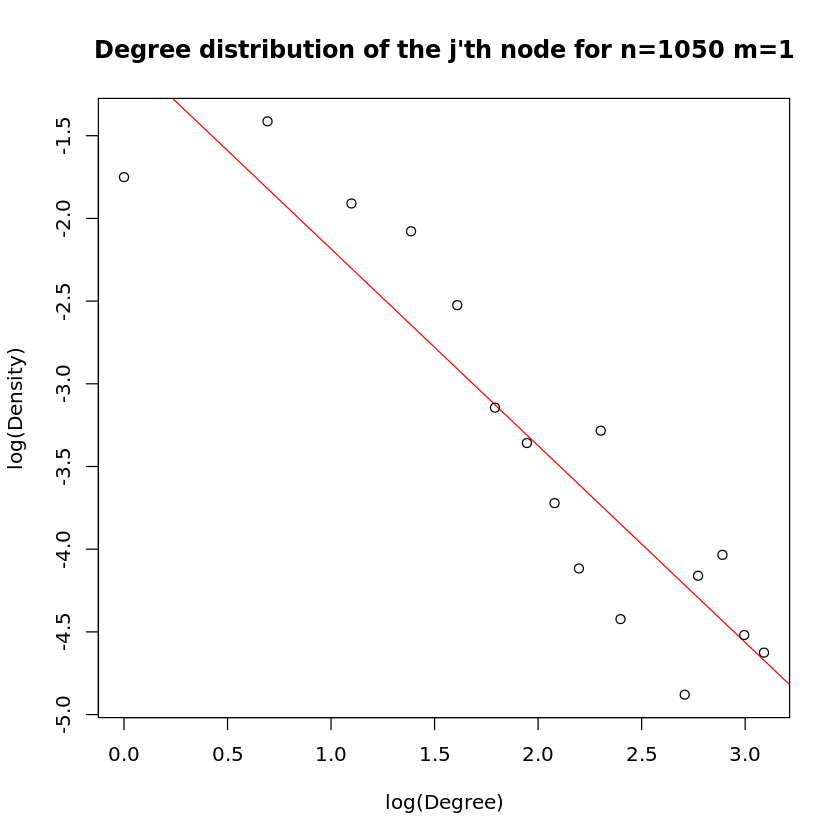


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
    -0.8692      -1.4818  



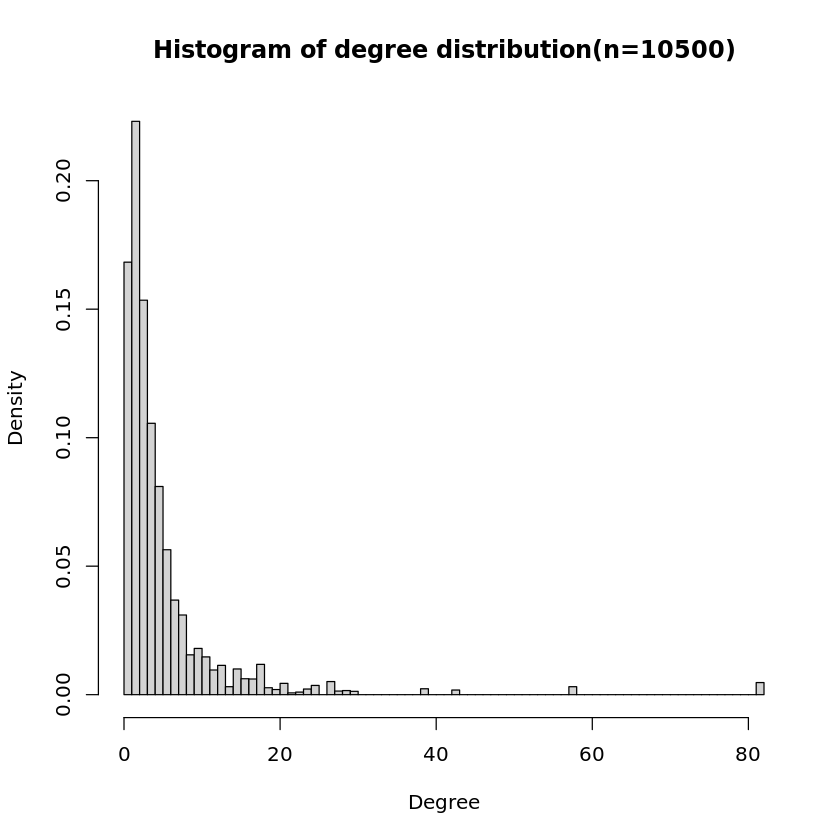

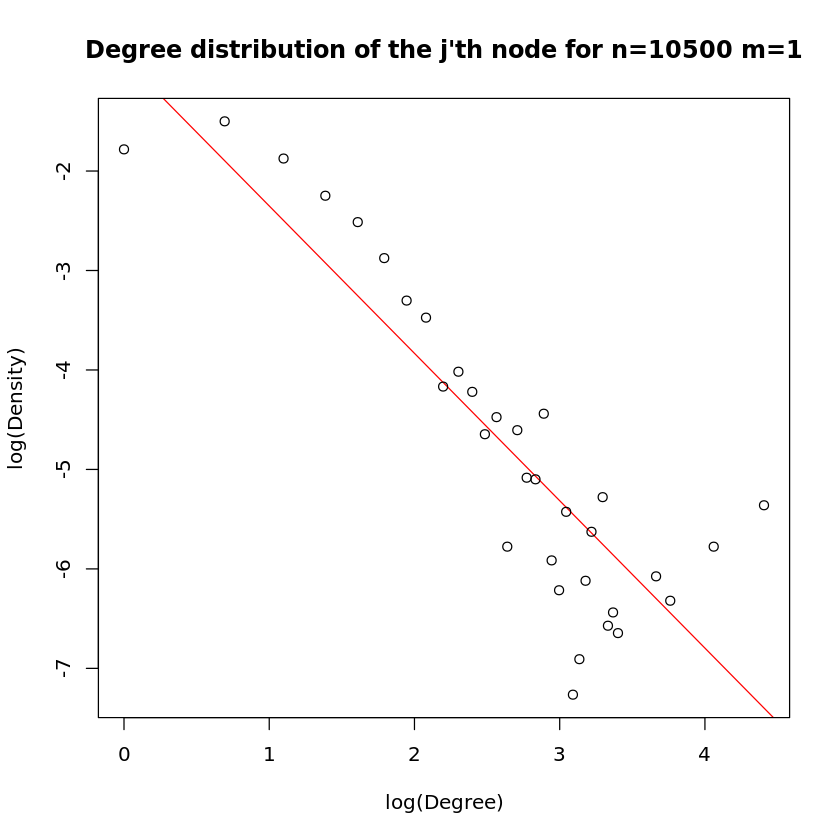

In [13]:
#2e
n_array = c(1050, 10500)
m = 1
iteration_times = 10000
for (n in n_array){
    g = barabasi.game(n=n, m=m, directed=FALSE)
    degree_neighbors = c()
    for (i in seq(1:iteration_times)){
        node_i = sample(n,1)
        neighbors_node_i = neighbors(g, node_i)
        if (length(neighbors_node_i) == 1){
            node_j = neighbors_node_i
        } else {
            node_j = sample(neighbors_node_i, 1)
        }
        degree_neighbors = c(degree_neighbors, degree(g, node_j))
    }
    h = hist(degree_neighbors, breaks=seq(0, max(degree_neighbors)),
             freq=FALSE, main=sprintf("Histogram of degree distribution(n=%d)", n),
             xlab="Degree")
    plot_x = tail(h$breaks, length(h$breaks) -1)
    plot_y = h$density
    idx = which(plot_y != 0, arr.ind=TRUE)
    log_degree = log(seq(1:length(plot_y)))[idx]
    log_distribution = log(plot_y)[idx]
    relation=lm(log_distribution ~ log_degree)
    print(relation)
    plot(log_degree, log_distribution, abline(relation, col="red"),
         main=sprintf("Degree distribution of the j'th node for n=%d m=%d",n,m),
         xlab='log(Degree)', ylab='log(Density)')
}

f) Estimate the expected degree of a node that is added at time step $i$ for $1 \leq i \leq 1050$. Show the relationship between the age of nodes and their expected degree through an appropriate plot. Note that the newest added nodes is the youngest

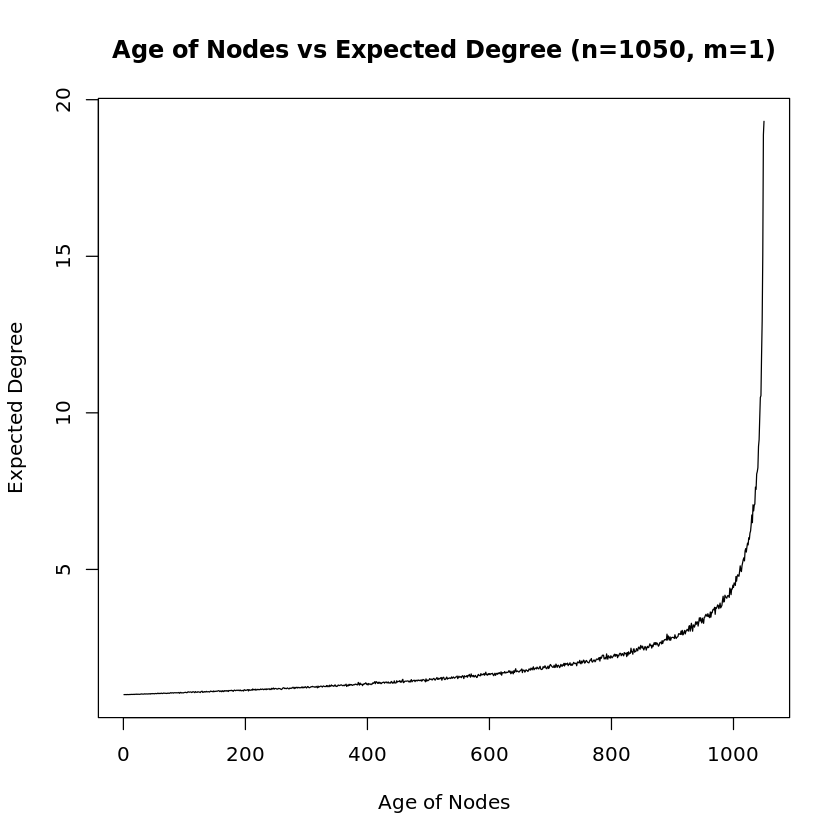

In [14]:
n = 1050
m = 1
iteration_times = 1050
degrees.sum = vector(mode='numeric', length=iteration_times)
for (i in 1:iteration_times){
    g = barabasi.game(n=n, m=m, directed=FALSE)
    degrees.sum = degrees.sum + degree(g)
}
plot(seq(1:iteration_times), rev(degrees.sum/iteration_times),
      main="Age of Nodes vs Expected Degree (n=1050, m=1)", xlab="Age of Nodes",
      ylab="Expected Degree", type='l')

g) Repeat the previous parts (a-f) for $m=2$, and $m=6$. Comapre the results of each part for different values of $m$.

Is the network alwasy connected? TRUE 
Modularty of the network: 0.5182008 
Degree Assortativity of the network: -0.06027656 
Is the network alwasy connected? TRUE 
Modularty of the network: 0.5345949 
Degree Assortativity of the network: -0.007264884 
For n =  1050
Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      1.090       -2.256  



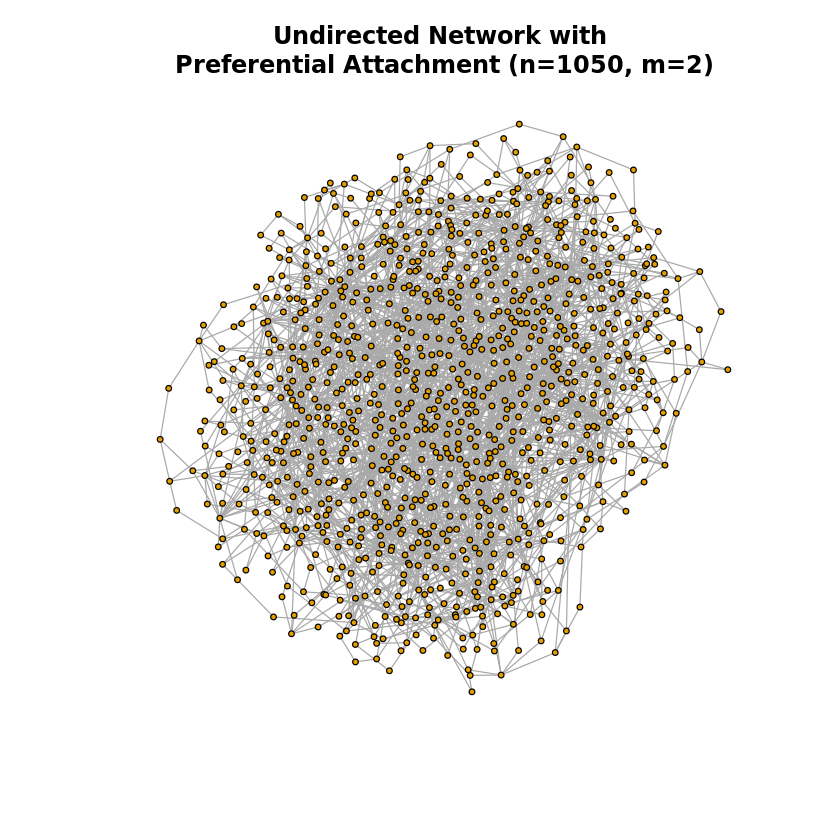

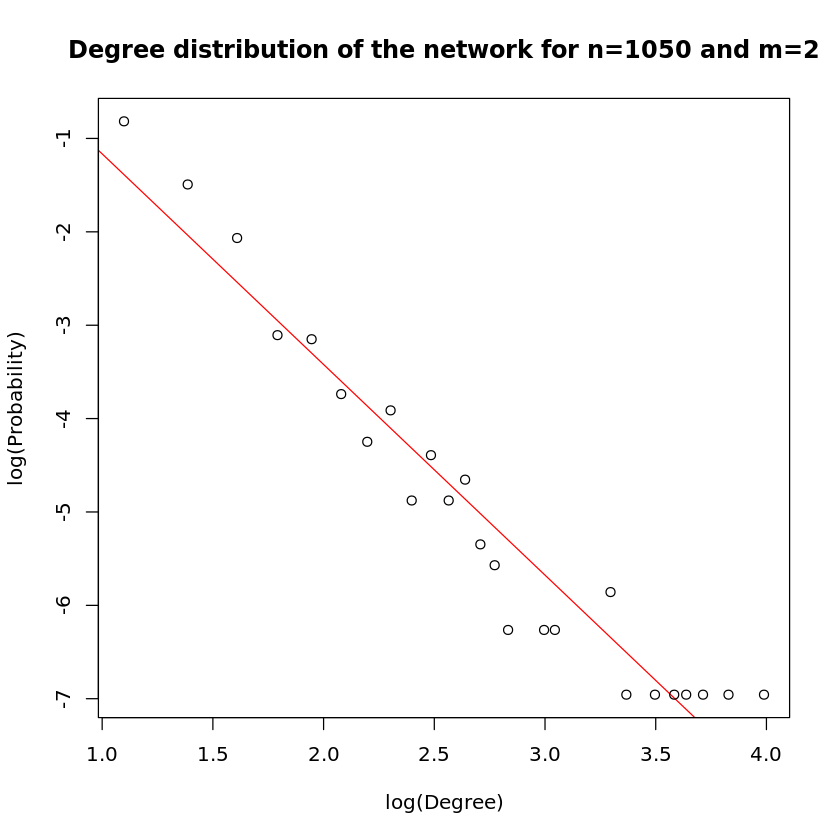

For n =  10500
Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      1.308       -2.566  



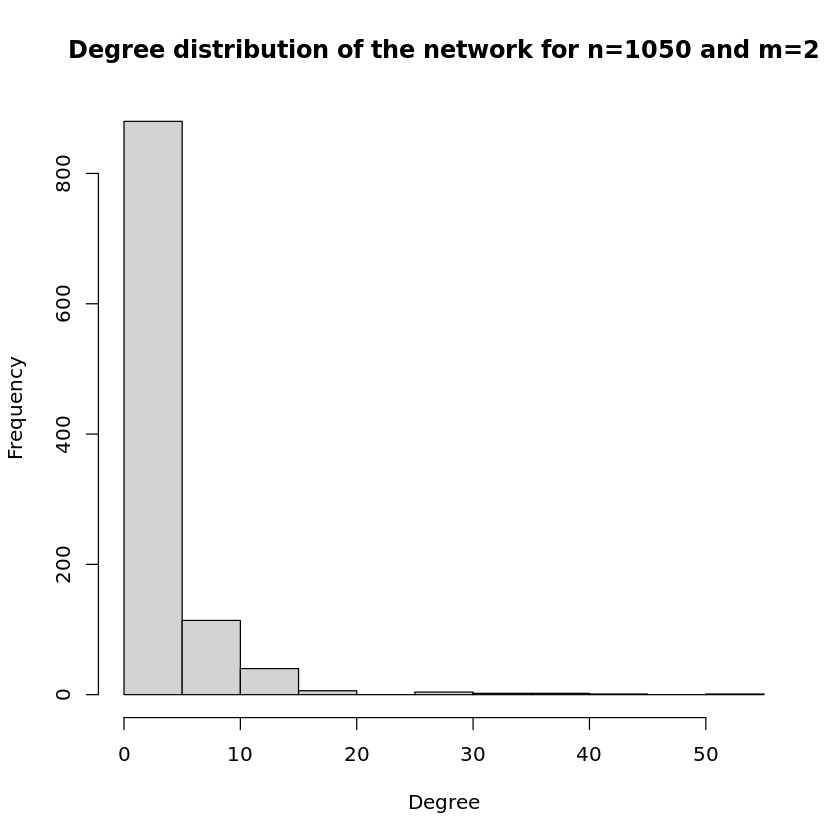

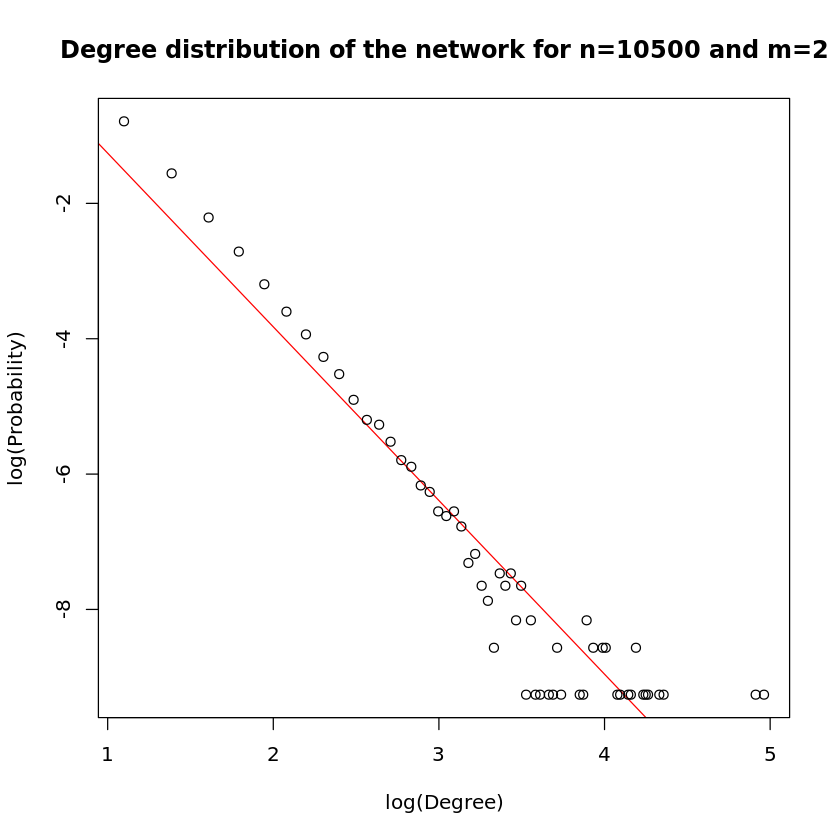

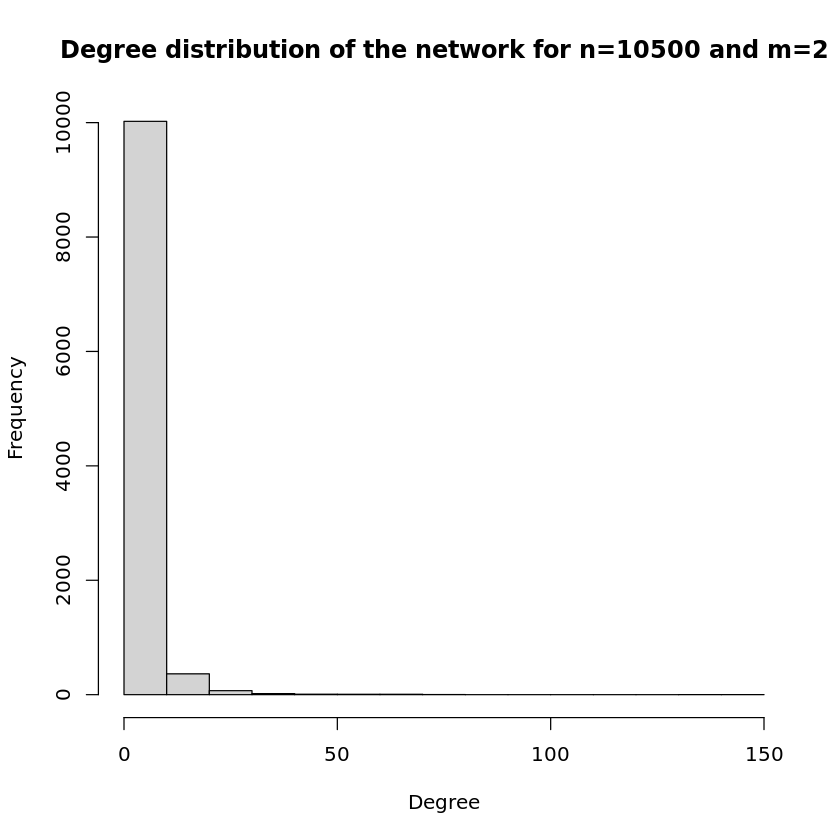


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
    -0.9846      -1.1307  



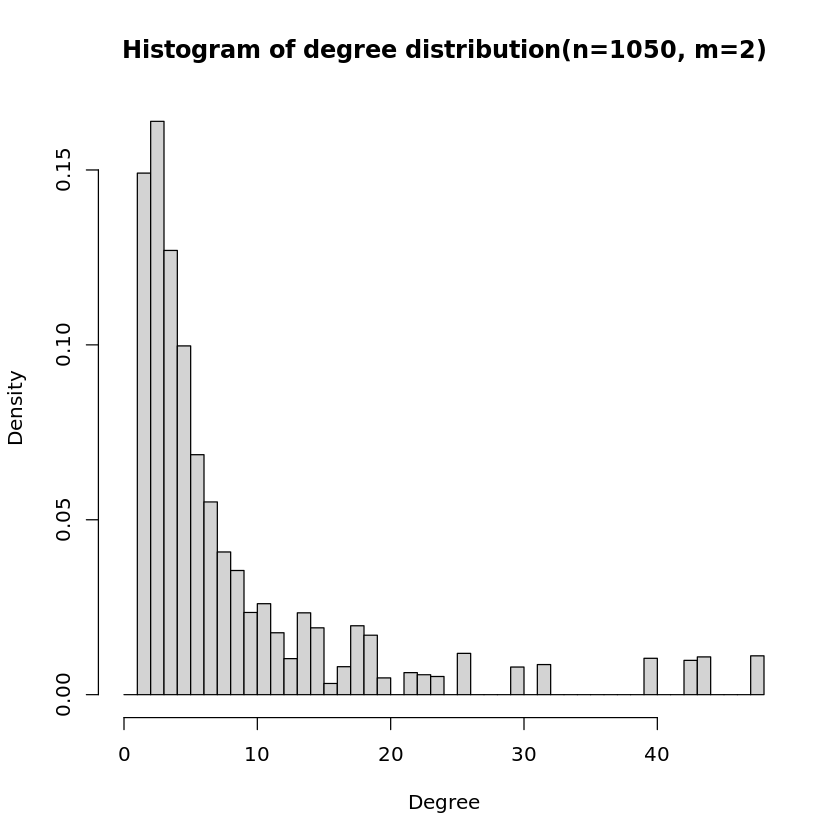

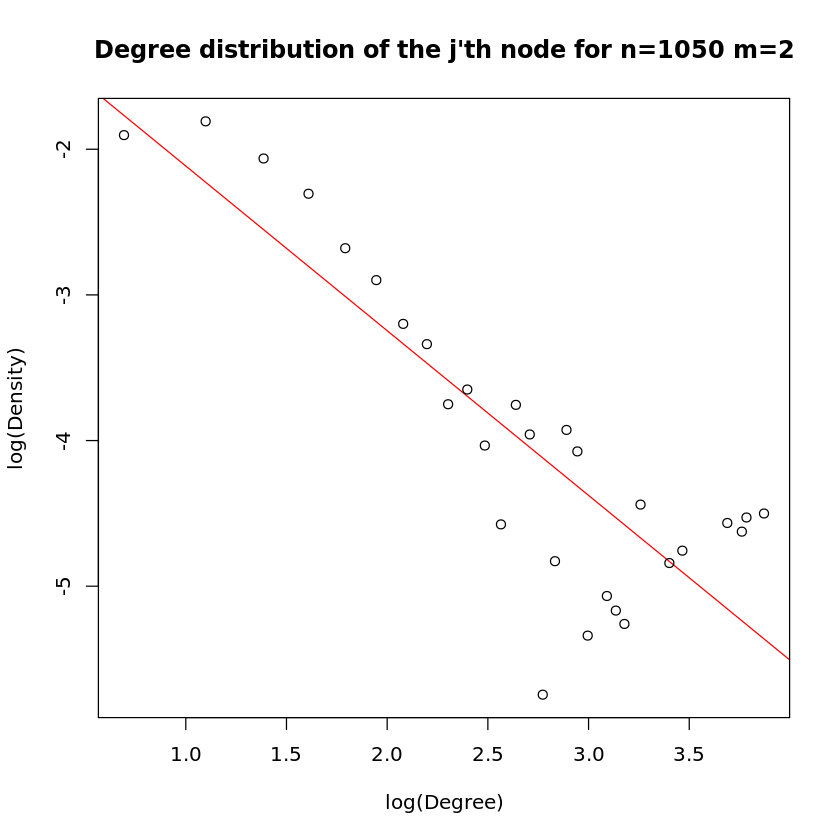


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
    -0.8657      -1.3584  



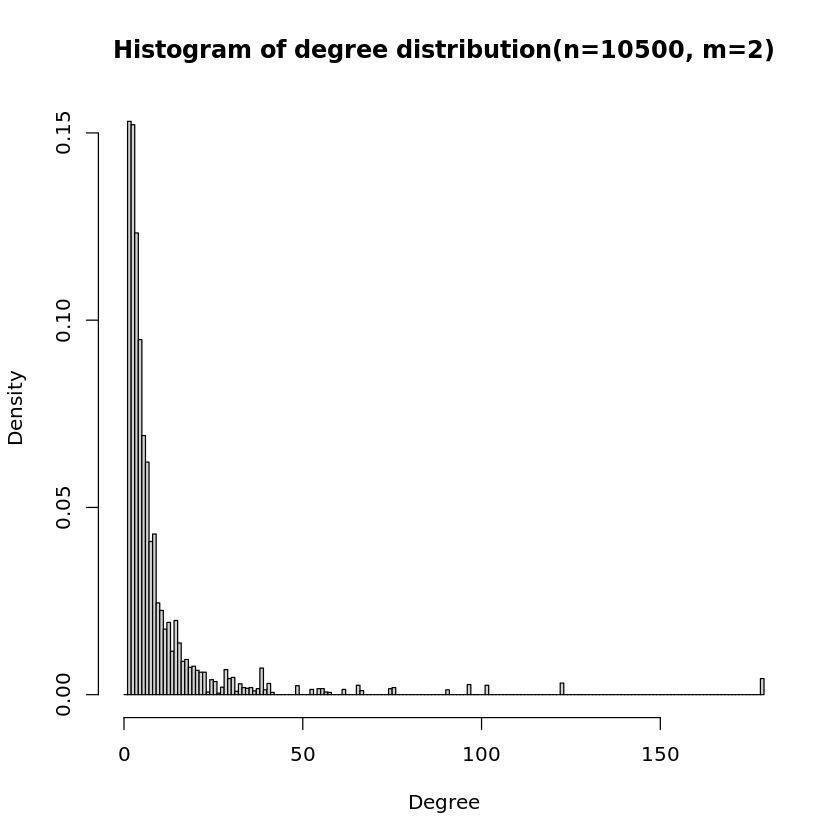

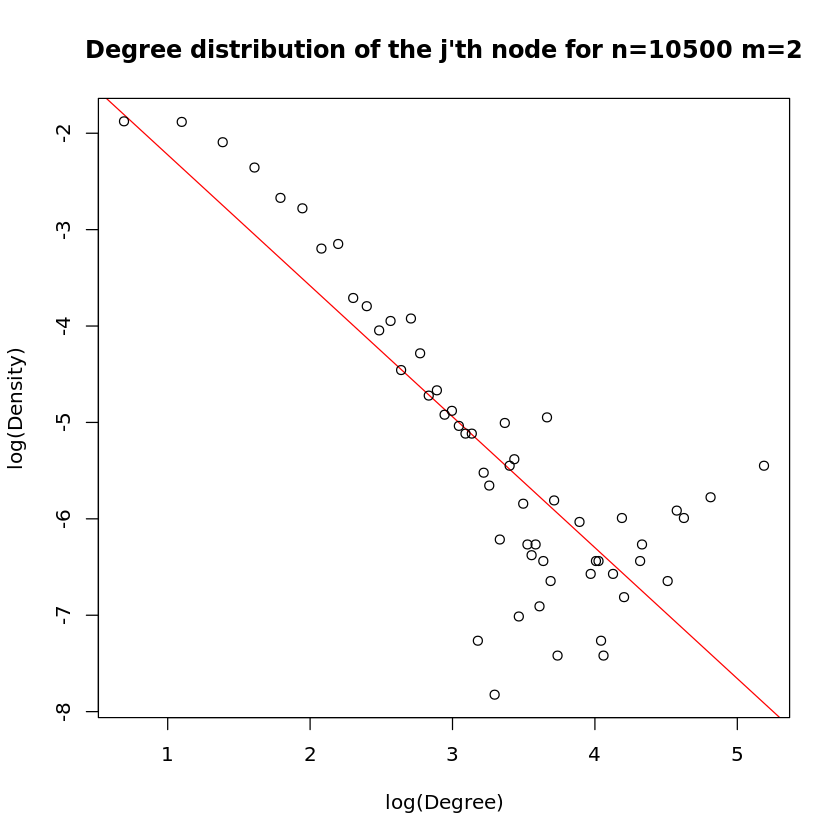

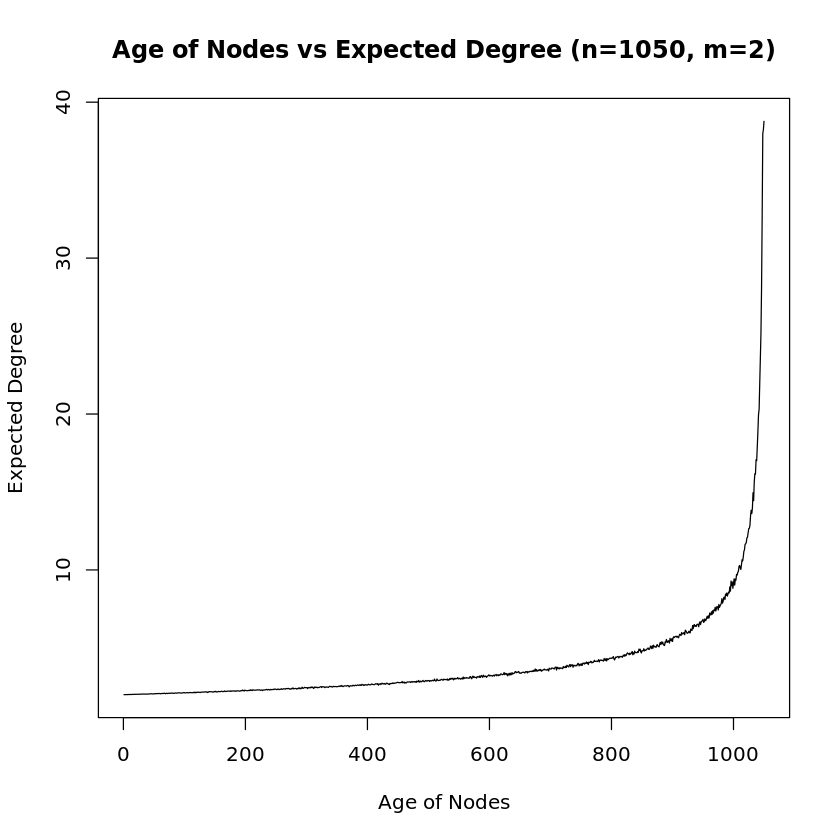

In [15]:
#m=2
#a
n <- 1050 # number of nodes
m <- 2 # Each new node attaches to m old nodes

# Creating the network
g <- barabasi.game(n, m=m, directed=FALSE)

# Check if the network is connected
is_connected <- is_connected(g)
plot(g, vertex.label="", vertex.size=2, main="Undirected Network with \nPreferential Attachment (n=1050, m=2)")
cat("Is the network alwasy connected?", is_connected, "\n")
#b
# Community detection with fast greedy method
communities <- cluster_fast_greedy(g)

# Measure modularity
mod <- modularity(communities)
cat("Modularty of the network:", mod, "\n")

# Compute the degree assortativity 
assortativity  <- assortativity_degree(g)
cat("Degree Assortativity of the network:", assortativity , "\n")
#c
n <- 10500 # number of nodes
m <- 2 # Each new node attaches to m old nodes

# Creating the network
g <- barabasi.game(n, m=m, directed=FALSE)

# Check if the network is connected
is_connected <- is_connected(g)

cat("Is the network alwasy connected?", is_connected, "\n")

# Community detection with fast greedy method
communities <- cluster_fast_greedy(g)

# Measure modularity
mod <- modularity(communities)
cat("Modularty of the network:", mod, "\n")

# Compute the degree assortativity 
assortativity  <- assortativity_degree(g)
cat("Degree Assortativity of the network:", assortativity , "\n")
#d
n_array = c(1050, 10500)
m = 2
for (n in n_array) {
    g = barabasi.game(n=n, m=m, directed=FALSE)
    deg_distribution = degree.distribution(g)
    idx = which(deg_distribution != 0, arr.ind=TRUE)
    x = log(seq(1:length(deg_distribution)))[idx]
    y = log(deg_distribution)[idx]

    cat(paste("For n = ", n))

    relation = lm(y ~ x)
    print(relation)
    plot(x,y,abline(relation, col='red'), main=sprintf("Degree distribution of the network for n=%d and m=%d", n, m), xlab="log(Degree)", ylab="log(Probability)")
    hist(degree(g), main=sprintf("Degree distribution of the network for n=%d and m=%d",n,m), xlab='Degree', ylab="Frequency")
}
#e
n_array = c(1050, 10500)
m = 2
iteration_times = 10000
for (n in n_array){
    g = barabasi.game(n=n, m=m, directed=FALSE)
    degree_neighbors = c()
    for (i in seq(1:iteration_times)){
        node_i = sample(n,1)
        neighbors_node_i = neighbors(g, node_i)
        if (length(neighbors_node_i) == 1){
            node_j = neighbors_node_i
        } else {
            node_j = sample(neighbors_node_i, 1)
        }
        degree_neighbors = c(degree_neighbors, degree(g, node_j))
    }
    h = hist(degree_neighbors, breaks=seq(0, max(degree_neighbors)),
             freq=FALSE, main=sprintf("Histogram of degree distribution(n=%d, m=%d)", n, m),
             xlab="Degree")
    plot_x = tail(h$breaks, length(h$breaks) -1)
    plot_y = h$density
    idx = which(plot_y != 0, arr.ind=TRUE)
    log_degree = log(seq(1:length(plot_y)))[idx]
    log_distribution = log(plot_y)[idx]
    relation=lm(log_distribution ~ log_degree)
    print(relation)
    plot(log_degree, log_distribution, abline(relation, col="red"),
         main=sprintf("Degree distribution of the j'th node for n=%d m=%d",n,m),
         xlab='log(Degree)', ylab='log(Density)')
}
#f
n = 1050
m = 2
iteration_times = 1050
degrees.sum = vector(mode='numeric', length=iteration_times)
for (i in 1:iteration_times){
    g = barabasi.game(n=n, m=m, directed=FALSE)
    degrees.sum = degrees.sum + degree(g)
}
plot(seq(1:iteration_times), rev(degrees.sum/iteration_times),
      main="Age of Nodes vs Expected Degree (n=1050, m=2)", xlab="Age of Nodes",
      ylab="Expected Degree", type='l')

Is the network alwasy connected? TRUE 
Modularty of the network: 0.250838 
Degree Assortativity of the network: -0.02721999 
Is the network alwasy connected? TRUE 
Modularty of the network: 0.2442378 
Degree Assortativity of the network: -0.001494201 
For n =  1050
Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      1.641       -2.060  



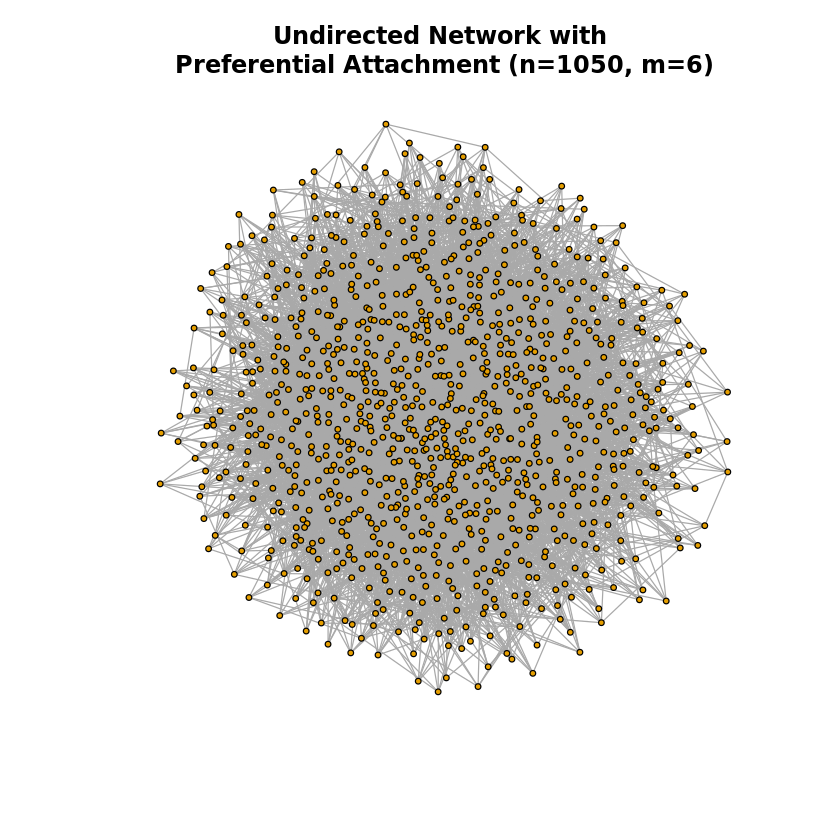

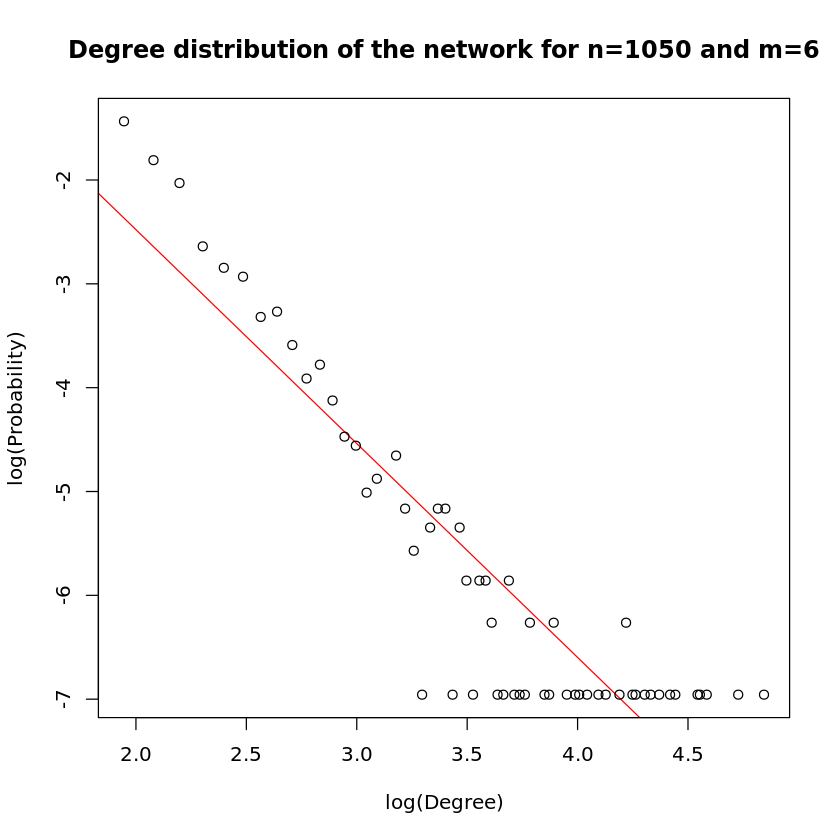

For n =  10500
Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      1.657       -2.202  



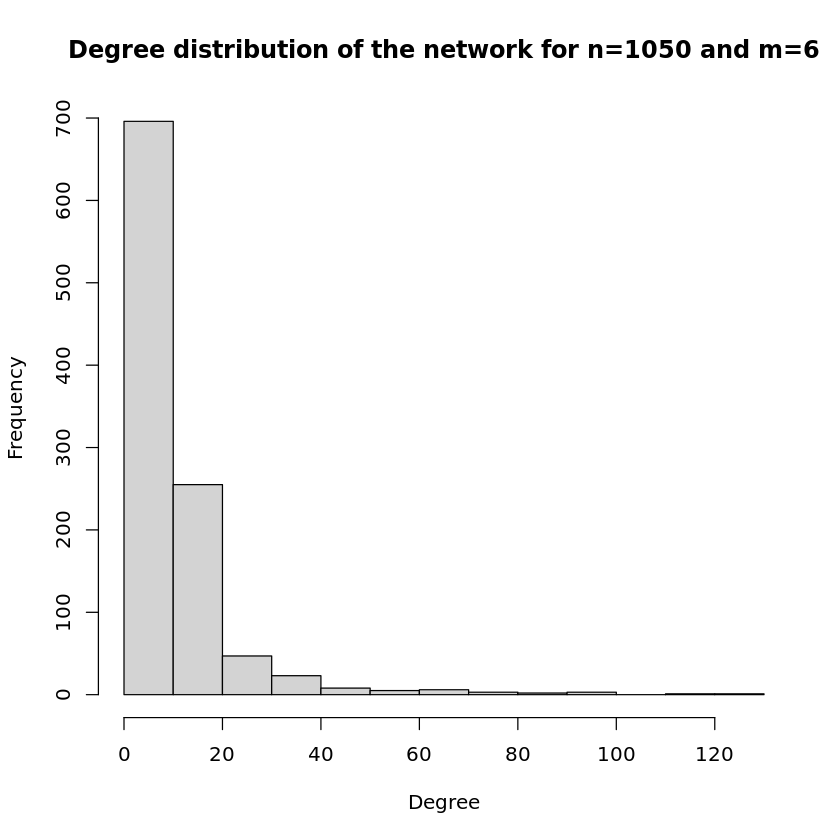

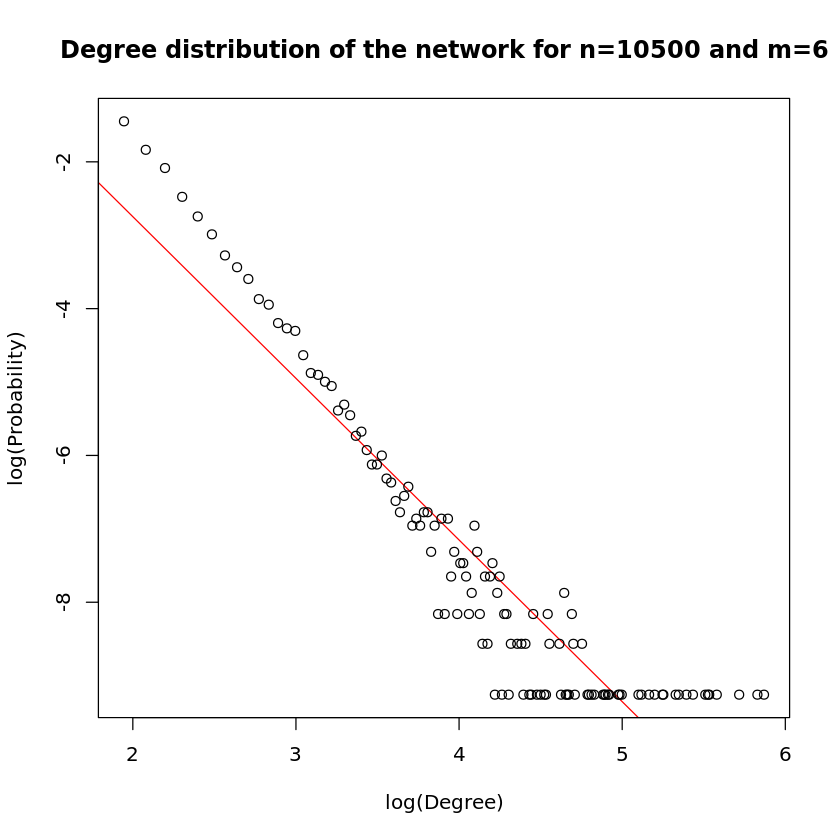

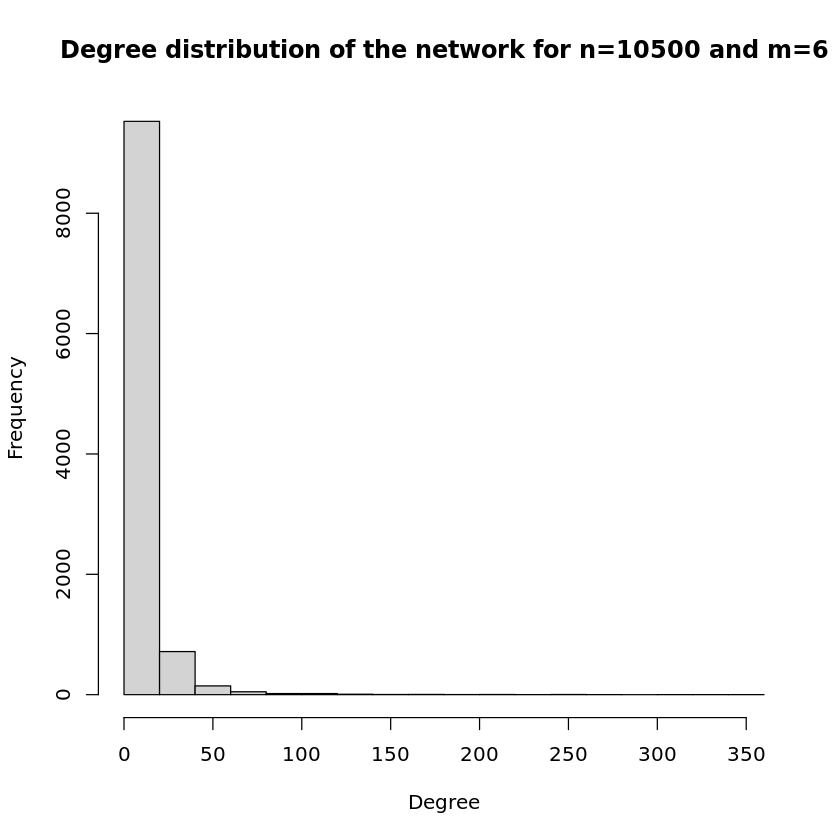


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
    -1.0759      -0.9733  



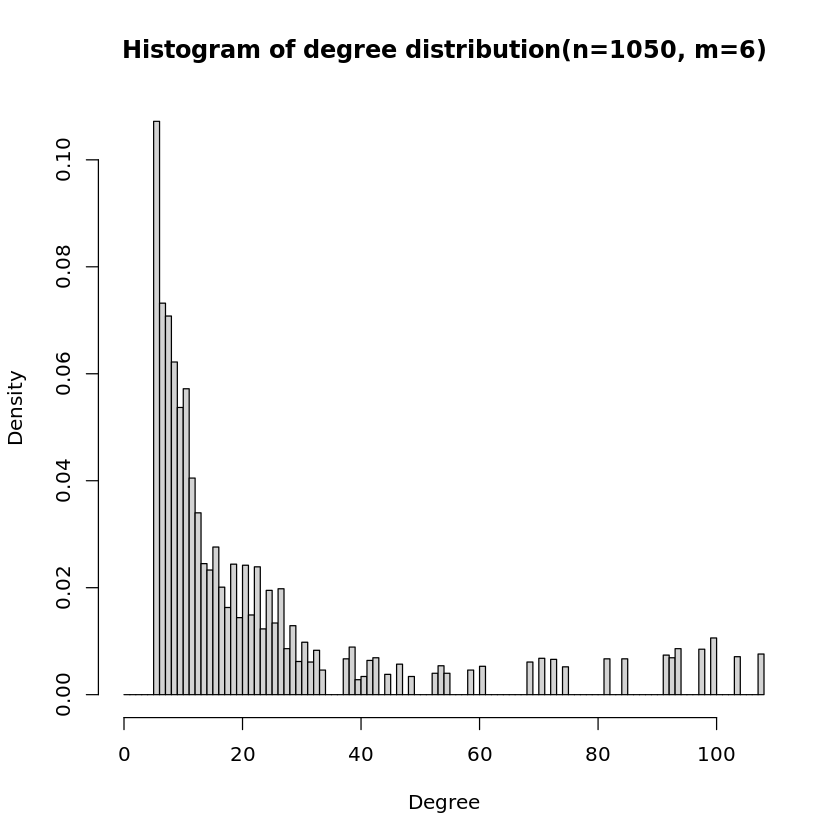

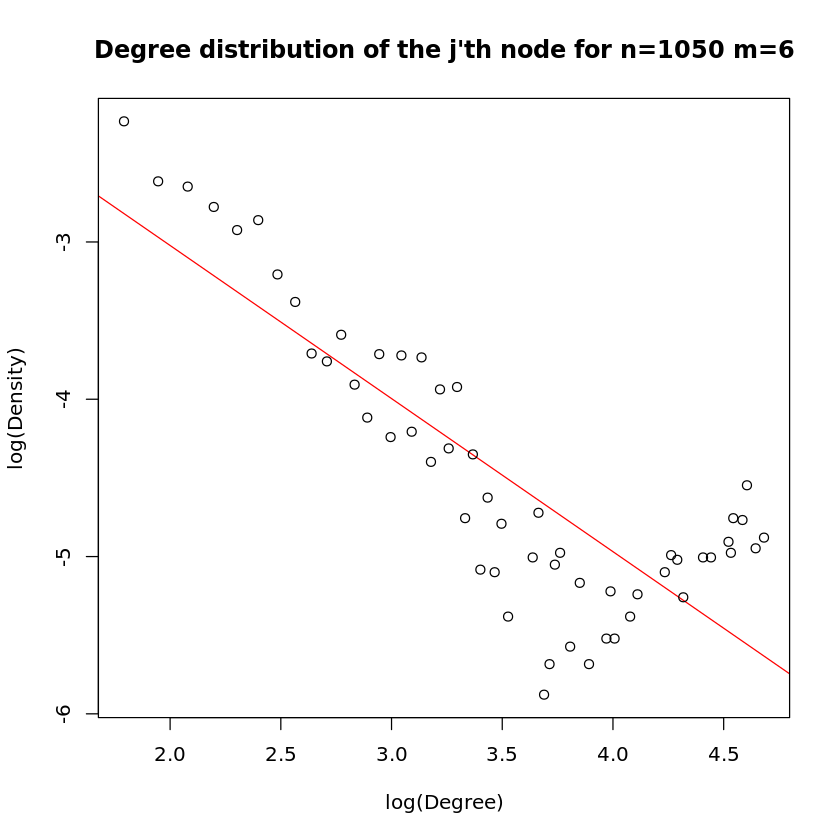


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
     -0.948       -1.185  



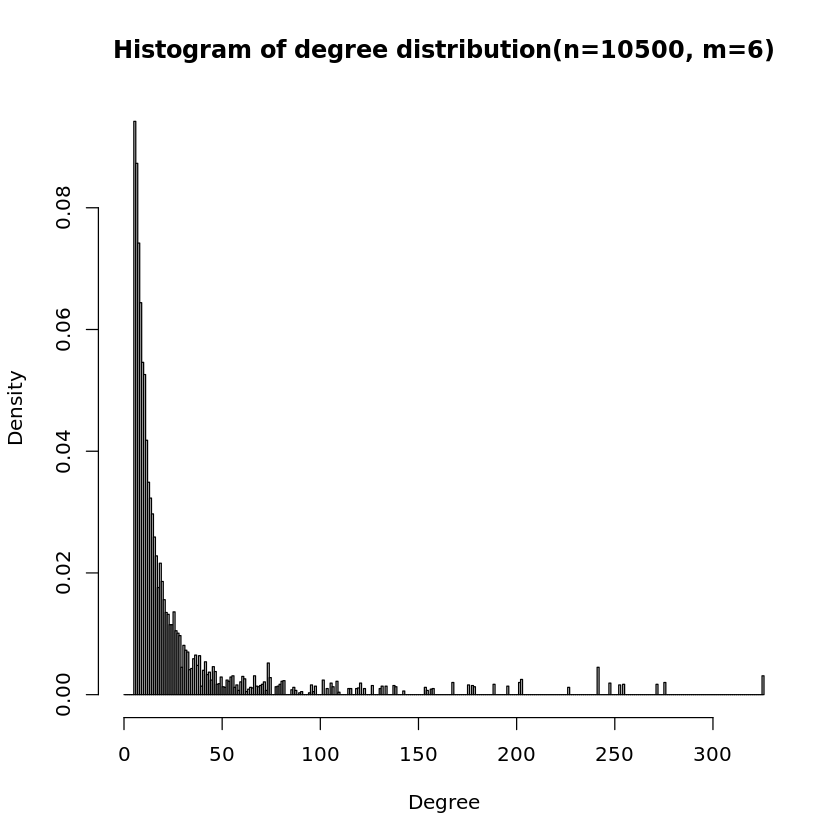

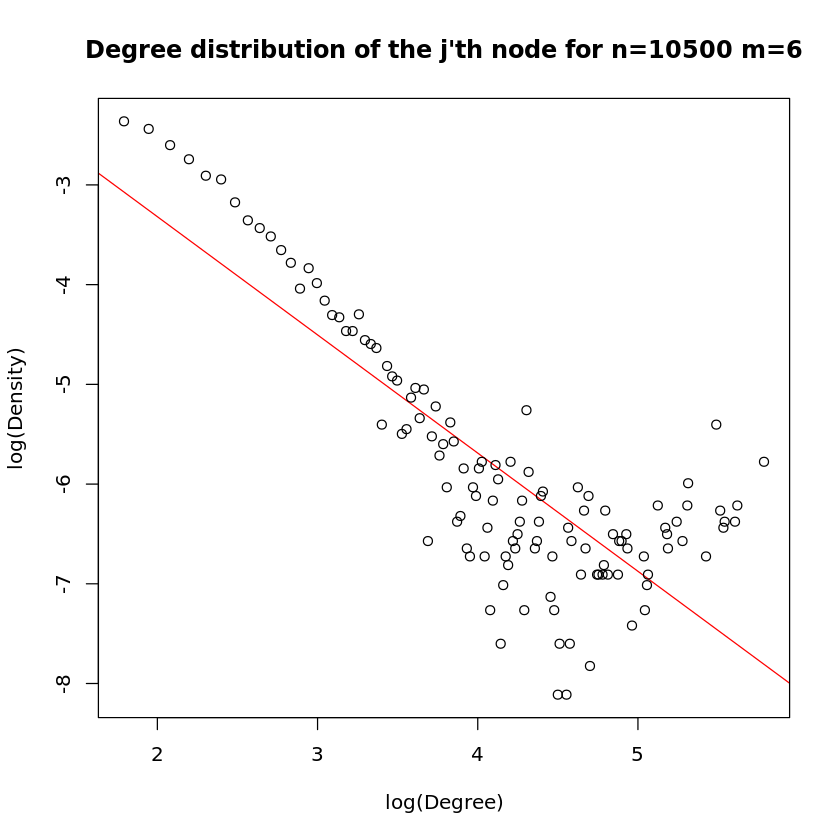

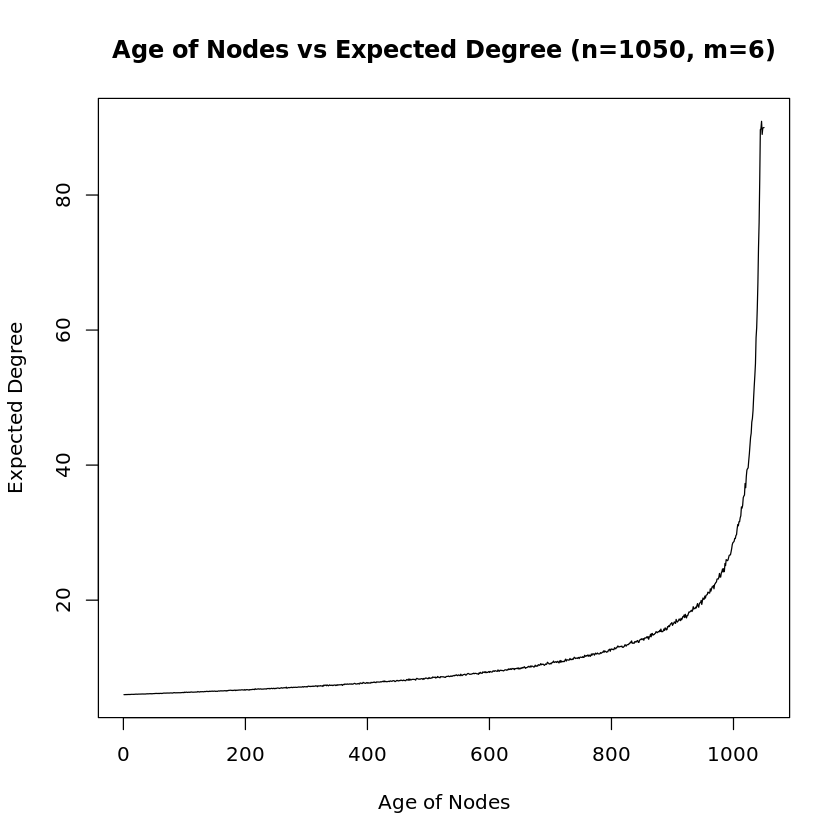

In [16]:
#m=6
#a
n <- 1050 # number of nodes
m <- 6 # Each new node attaches to m old nodes

# Creating the network
g <- barabasi.game(n, m=m, directed=FALSE)

# Check if the network is connected
is_connected <- is_connected(g)
plot(g, vertex.label="", vertex.size=2, main="Undirected Network with \nPreferential Attachment (n=1050, m=6)")
cat("Is the network alwasy connected?", is_connected, "\n")
#b
# Community detection with fast greedy method
communities <- cluster_fast_greedy(g)

# Measure modularity
mod <- modularity(communities)
cat("Modularty of the network:", mod, "\n")

# Compute the degree assortativity 
assortativity  <- assortativity_degree(g)
cat("Degree Assortativity of the network:", assortativity , "\n")
#c
n <- 10500 # number of nodes
m <- 6 # Each new node attaches to m old nodes

# Creating the network
g <- barabasi.game(n, m=m, directed=FALSE)

# Check if the network is connected
is_connected <- is_connected(g)

cat("Is the network alwasy connected?", is_connected, "\n")

# Community detection with fast greedy method
communities <- cluster_fast_greedy(g)

# Measure modularity
mod <- modularity(communities)
cat("Modularty of the network:", mod, "\n")

# Compute the degree assortativity 
assortativity  <- assortativity_degree(g)
cat("Degree Assortativity of the network:", assortativity , "\n")
#d
n_array = c(1050, 10500)
m = 6
for (n in n_array) {
    g = barabasi.game(n=n, m=m, directed=FALSE)
    deg_distribution = degree.distribution(g)
    idx = which(deg_distribution != 0, arr.ind=TRUE)
    x = log(seq(1:length(deg_distribution)))[idx]
    y = log(deg_distribution)[idx]

    cat(paste("For n = ", n))

    relation = lm(y ~ x)
    print(relation)
    plot(x,y,abline(relation, col='red'), main=sprintf("Degree distribution of the network for n=%d and m=%d", n, m), xlab="log(Degree)", ylab="log(Probability)")
    hist(degree(g), main=sprintf("Degree distribution of the network for n=%d and m=%d",n,m), xlab='Degree', ylab="Frequency")
}
#e
n_array = c(1050, 10500)
m = 6
iteration_times = 10000
for (n in n_array){
    g = barabasi.game(n=n, m=m, directed=FALSE)
    degree_neighbors = c()
    for (i in seq(1:iteration_times)){
        node_i = sample(n,1)
        neighbors_node_i = neighbors(g, node_i)
        if (length(neighbors_node_i) == 1){
            node_j = neighbors_node_i
        } else {
            node_j = sample(neighbors_node_i, 1)
        }
        degree_neighbors = c(degree_neighbors, degree(g, node_j))
    }
    h = hist(degree_neighbors, breaks=seq(0, max(degree_neighbors)),
             freq=FALSE, main=sprintf("Histogram of degree distribution(n=%d, m=%d)", n, m),
             xlab="Degree")
    plot_x = tail(h$breaks, length(h$breaks) -1)
    plot_y = h$density
    idx = which(plot_y != 0, arr.ind=TRUE)
    log_degree = log(seq(1:length(plot_y)))[idx]
    log_distribution = log(plot_y)[idx]
    relation=lm(log_distribution ~ log_degree)
    print(relation)
    plot(log_degree, log_distribution, abline(relation, col="red"),
         main=sprintf("Degree distribution of the j'th node for n=%d m=%d",n,m),
         xlab='log(Degree)', ylab='log(Density)')
}
#f
n = 1050
m = 6
iteration_times = 1050
degrees.sum = vector(mode='numeric', length=iteration_times)
for (i in 1:iteration_times){
    g = barabasi.game(n=n, m=m, directed=FALSE)
    degrees.sum = degrees.sum + degree(g)
}
plot(seq(1:iteration_times), rev(degrees.sum/iteration_times),
      main="Age of Nodes vs Expected Degree (n=1050, m=6)", xlab="Age of Nodes",
      ylab="Expected Degree", type='l')

h) Again, generate a preferential attachment network with $n=1050, m=1$. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Comapre the two procedures for creating random power-law networks.

Warning message:
“`fastgreedy.community()` was deprecated in igraph 2.0.0.
ℹ Please use `cluster_fast_greedy()` instead.”


Modularity of original graph is 0.9362528 


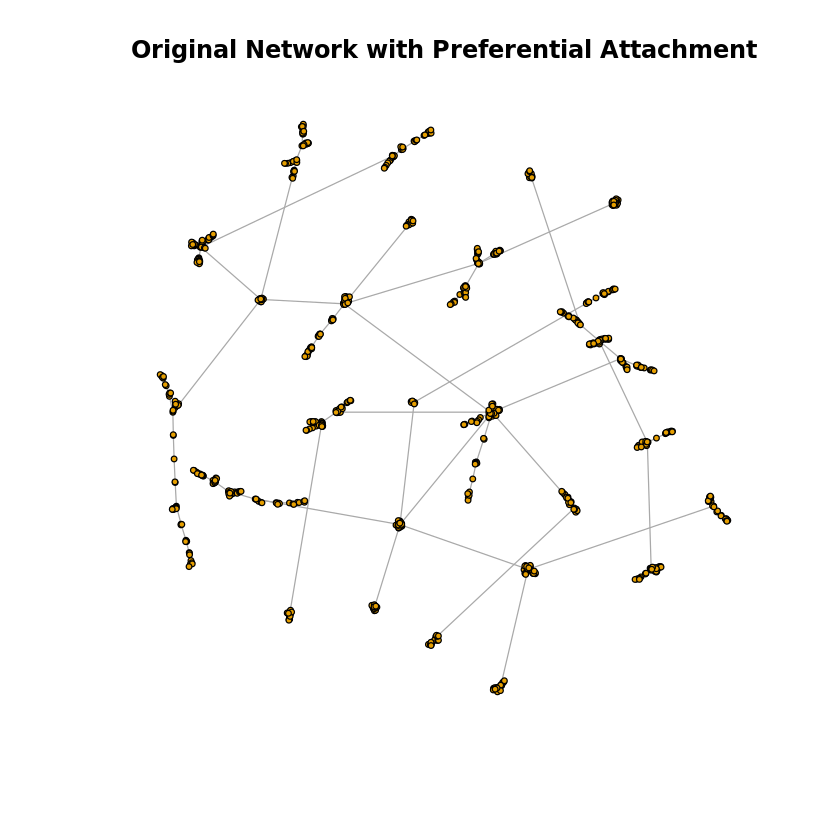

Modularity of new graph is 0.8531058 


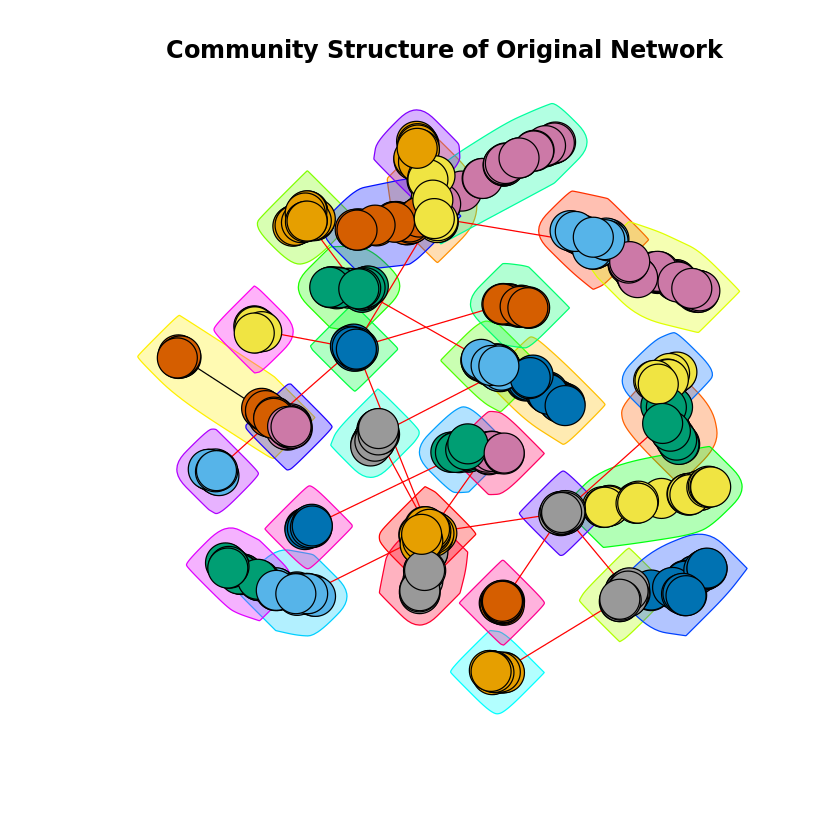

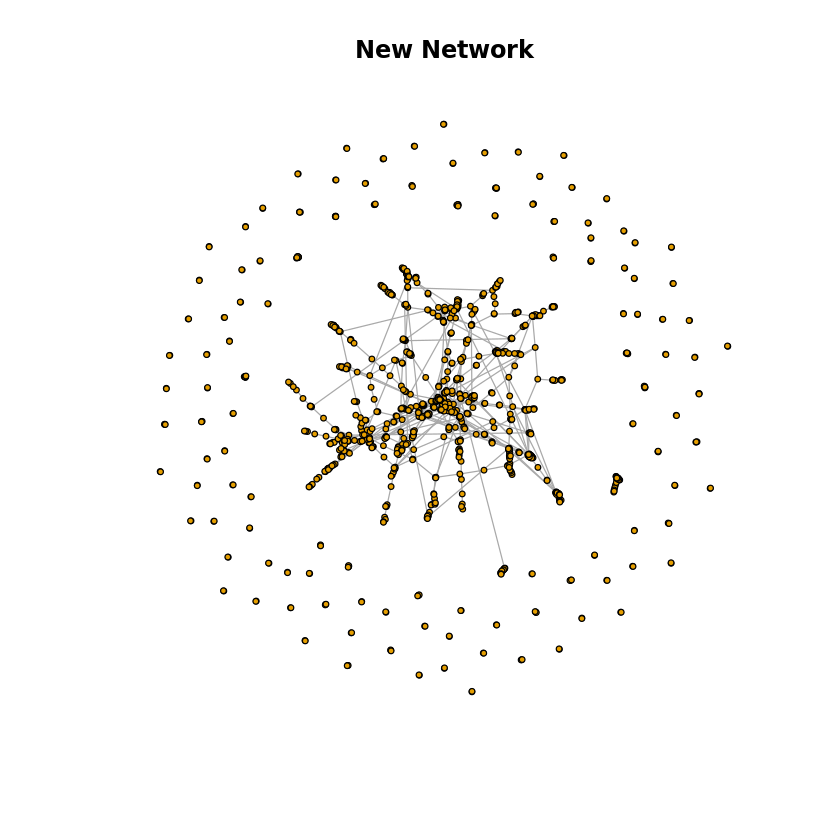

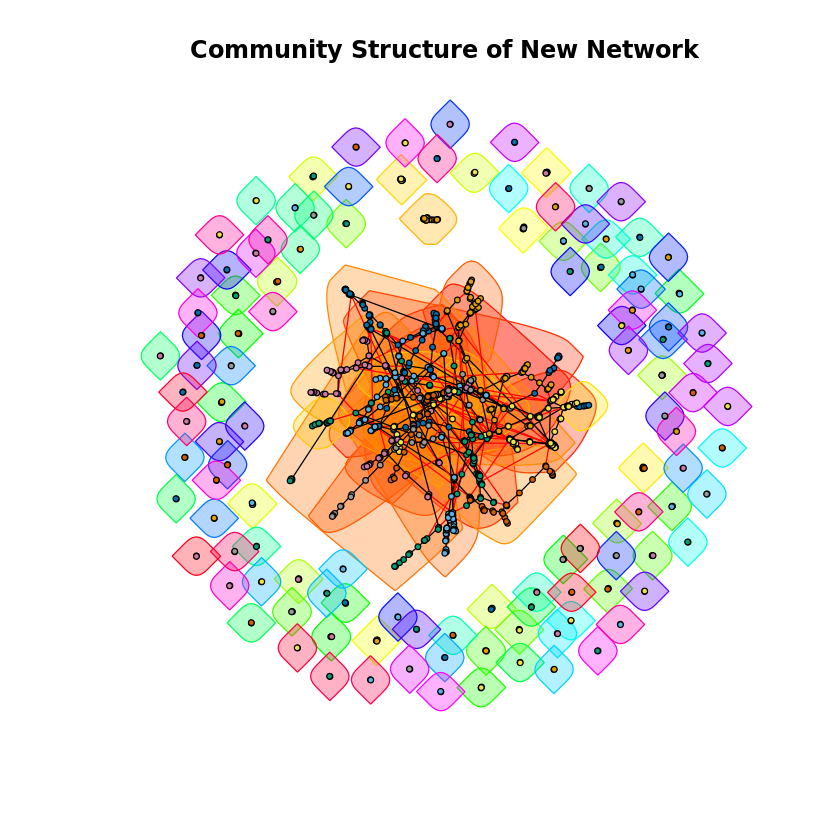

In [17]:
n = 1050
m = 1
g1 = barabasi.game(n=n, m=m, directed = FALSE)
degree1 = degree(g1)
g_comm1 = fastgreedy.community(g1)
modularity_g1 = modularity(g_comm1)
cat("Modularity of original graph is", modularity_g1, "\n")
plot(g1, vertex.size=2, vertex.label=NA,
     main="Original Network with Preferential Attachment")
plot(g_comm1, g1, vertex_size=2, vertex.label=NA, 
     main='Community Structure of Original Network')

g2 = sample_degseq(degree1, method = "simple.no.multiple")
g_comm2 = fastgreedy.community(g2)
modularity_g2 = modularity(g_comm2)
cat("Modularity of new graph is", modularity_g2, "\n")
plot(g2, vertex.size=2, vertex.label=NA, 
     main="New Network")
plot(g_comm2, g2, vertex.size=2, vertex.label=NA,
     main="Community Structure of New Network")

## 3. Create a modified preferential attachment model that penalizes the age of a node

a) Each time a new vertex is added, it creates $m$ links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. In particular, the probability that a newly added vertex connects to an old vertex is proportional to:
$P[i] ~ (ck_i^{\alpha}+\alpha)(dl^{\beta}_{i}+b)$,
where $k_i$ is the degree of vertex $i$ in the current time step, and $l_i$ is the age of vertex $i$. Produce such an undirected network with 1050 nodes and parameters $m=1$, $\alpha=1$, $\beta=-1$, and $a=c=d=1$, $b=0$. PLot the degree distribution. What is the power law exponent?

For n =  1050
Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.095       -3.304  



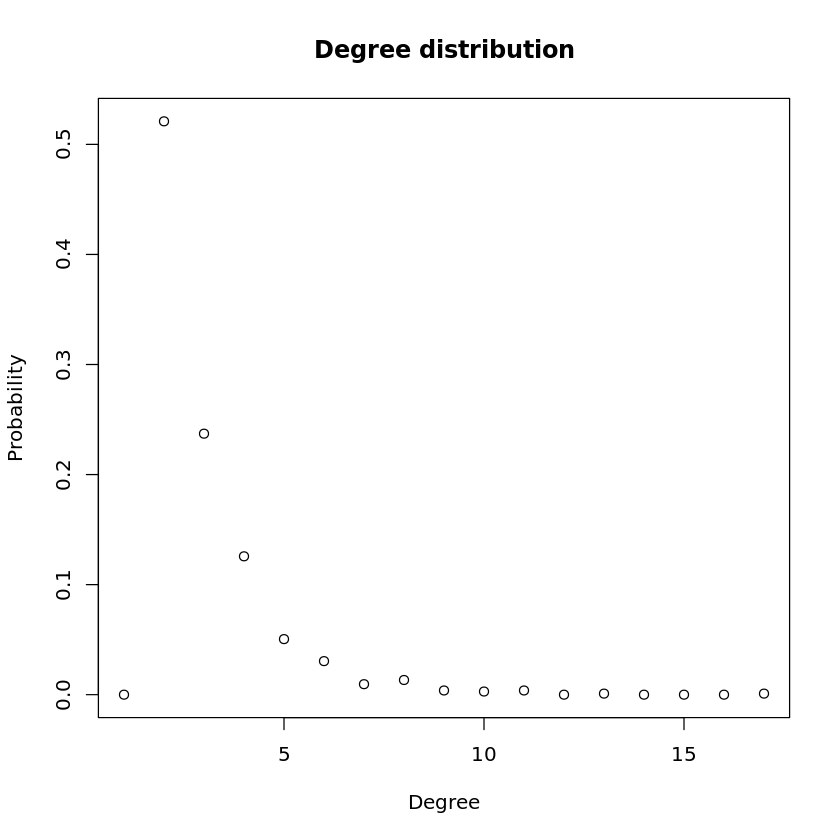

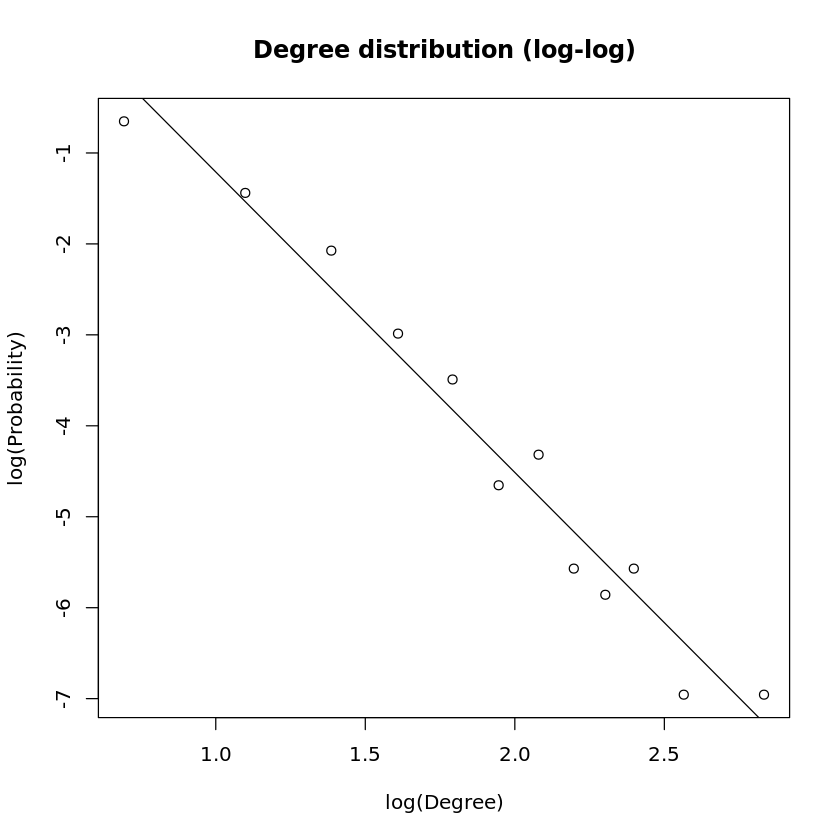

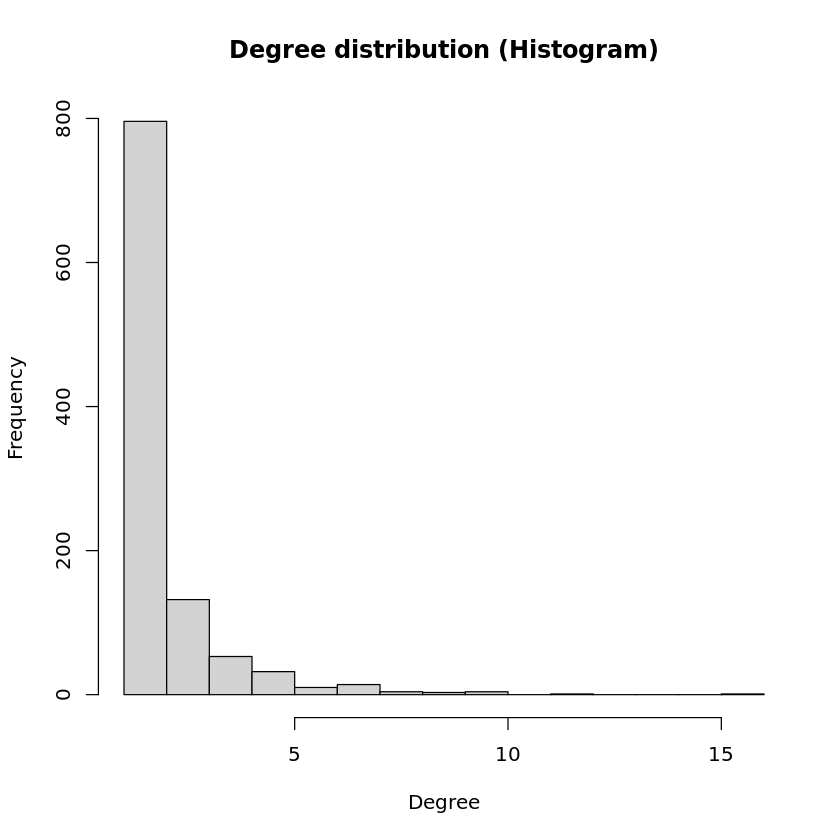

In [18]:
n = 1050
m = 1
alpha = 1
beta = -1
a = c = d = 1
b = 0
g = sample_pa_age(n=n, pa.exp = alpha, m=m, aging.exp = beta, zero.deg.appeal = a,
                  zero.age.appeal=b, deg.coef=c, age.coef=d, aging.bin=1050, directed=FALSE)
deg_distribution = degree.distribution(g)
idx = which(deg_distribution != 0, arr.ind=TRUE)
x = log(seq(1:length(deg_distribution)))[idx]
y = log(deg_distribution)[idx]

cat("For n = ", n)
relation = lm(y ~ x)
print(relation)
plot(degree.distribution(g), main="Degree distribution", xlab="Degree", ylab="Probability")
plot(x,y,abline(relation),main="Degree distribution (log-log)", xlab='log(Degree)', ylab="log(Probability)")
hist(degree(g), main="Degree distribution (Histogram)", xlab="Degree", ylab="Frequency")

b) Use fast greedy method to find the community structure. What is the modularity?

Is the graph always connected:  TRUE 
The modularity is  0.9372497

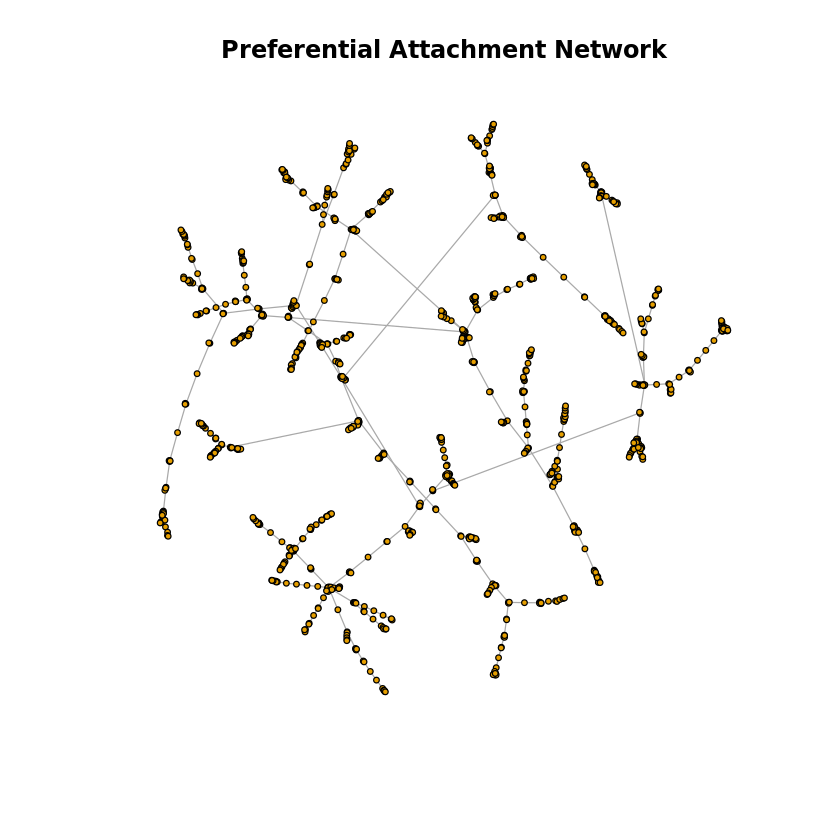

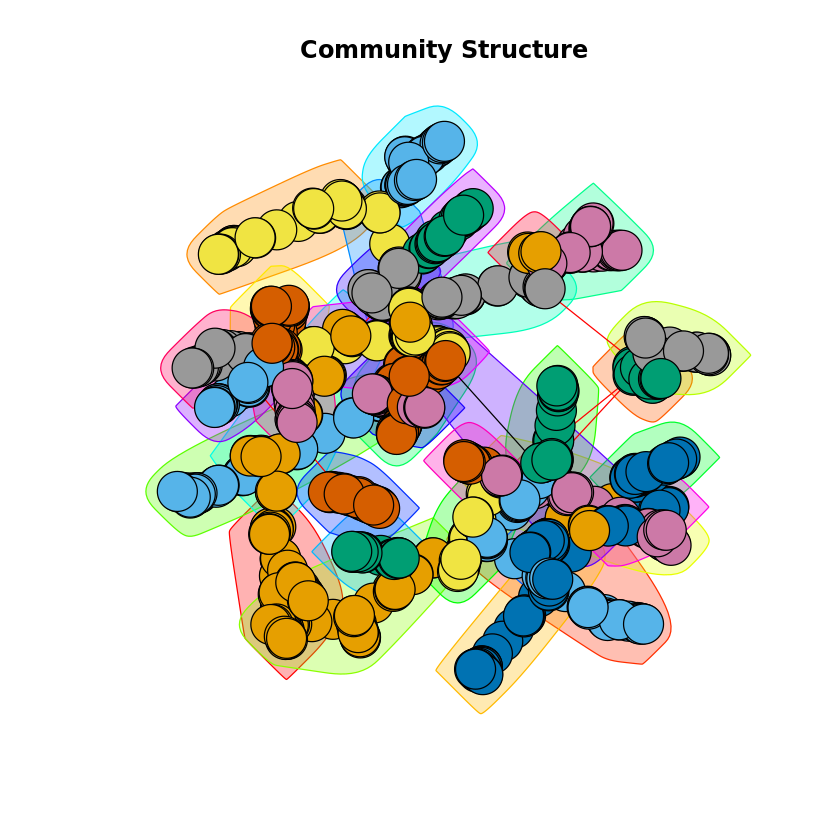

In [19]:
cat("Is the graph always connected: ", is.connected(g), "\n")
plot(g,vertex.label="", main='Preferential Attachment Network', vertex.size=2)
g_comm = cluster_fast_greedy(g)
community_size = sizes(g_comm)
g_modularity = modularity(g_comm)
cat("The modularity is ", g_modularity)
plot(g_comm, g, main="Community Structure", vertex_size=2, vertex.label=NA)

# 2. Random Walk on Networks

## 1. Random walk on Erdos-Renyi networks

a) Create an undirected random network with 900 nodes, and the probability $p$ for drawing and edge between any pair of nodes equal to 0.015.

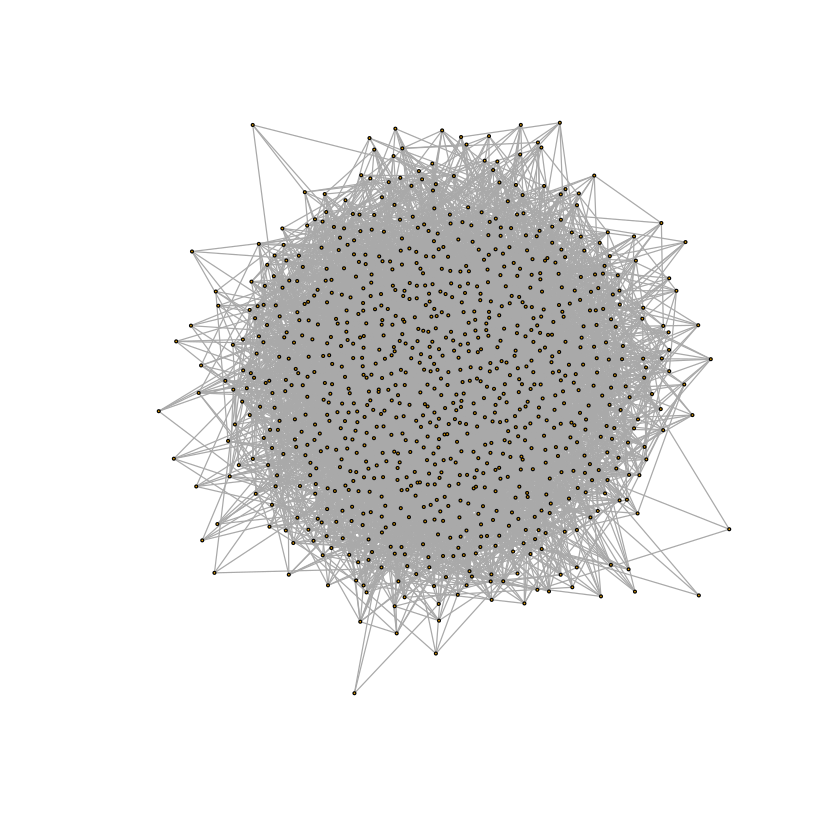

In [20]:
# number of nodes
n <- 900
# Probability of edge creation
p <- 0.015
# Generate the random graph
g <- erdos.renyi.game(n, p, type="gnp", directed=FALSE)
# Plot the graph
plot(g, vertex.size=1, vertex.label=NA)

b) Let a random walker start from a randomly selected node (no teleportation). We use $t$ to denote the number of steps that the walker has taken. Measure the average distance (defined as the shortest path length) $<s(t)>$ of the walker from his starting point at step $t$. Also, measure the variance $\sigma^2(t)=<(s(t)-<s(t)>)^2>$ of this distance. Plot $<s(t)$ v.s. $t$ and $\sigma^2(t)$ v.s. $t$. Here, the average $<.>$ is over random choices of the starting nodes.

In [21]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)

    end_nodes = numeric(length=num_steps)
    v = start_node
    for (i in 1:num_steps) {
        PMF = transition_matrix[v,]
        v = sample(1:vcount(g), 1, prob=PMF)
        end_nodes[i] = v
    }
    return(end_nodes)
}

Warning message:
“`shortest.paths()` was deprecated in igraph 2.0.0.
ℹ Please use `distances()` instead.”


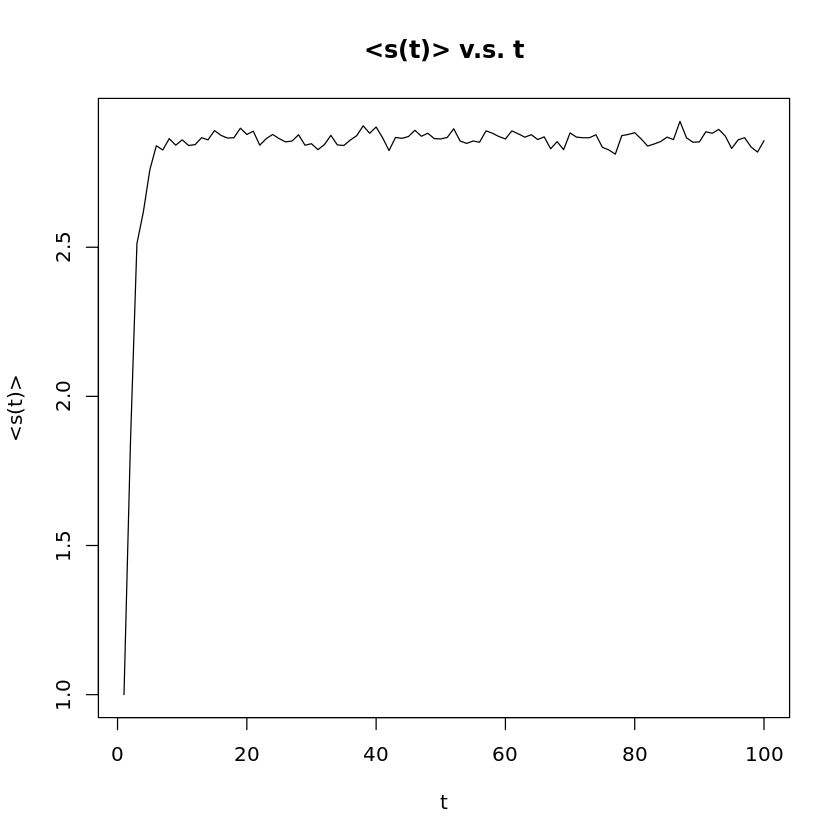

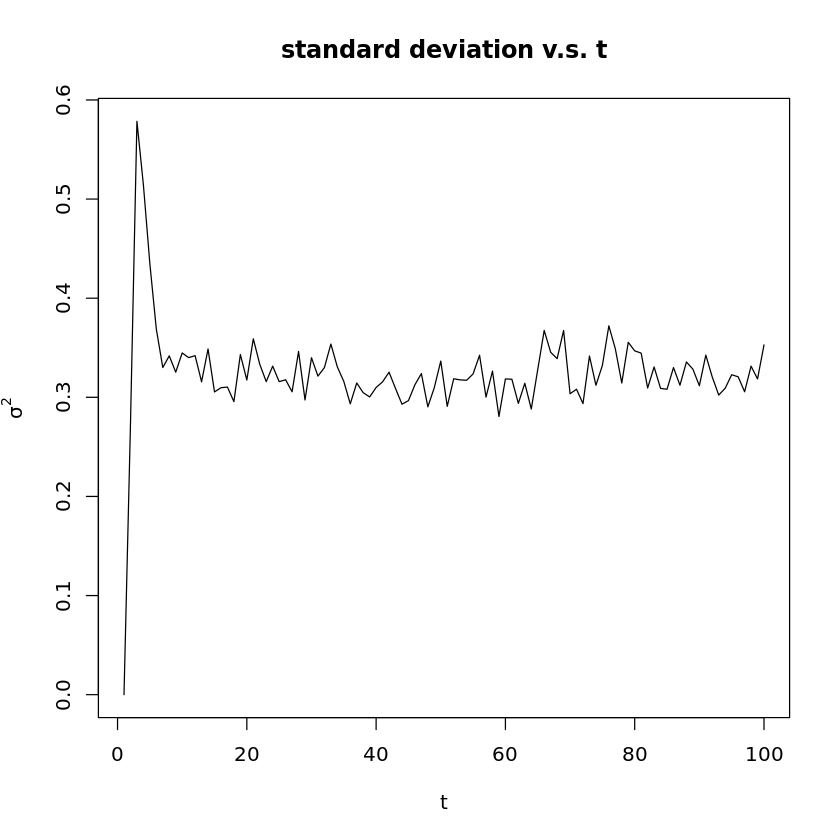

In [22]:
plotgraph_with_lastnodes = function(g, steps=100, times=1000) {
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    tm = create_transition_matrix(g.giant)
    nodes = matrix(NA, nrow=times, ncol=steps)
    last_nodes = array(1:times)
    for (i in 1:times) {
        start = sample(1:vcount(g.giant), 1)
        row_nodes = random_walk(g.giant, steps, start, tm)
        last_nodes[i] = row_nodes[steps]
        nodes[i, ] = shortest.paths(g.giant, row_nodes, start)
    }
    means = colMeans(nodes)
    var = colVars(nodes)
    plot(means, type='l', main="<s(t)> v.s. t", xlab='t', ylab='<s(t)>')
    plot(var, type='l', main="standard deviation v.s. t", xlab='t', ylab=expression(sigma^2))
    return(last_nodes)
}

last_nodes = plotgraph_with_lastnodes(g)

c) Measure the degree distribution of the nodes reached at the end of the random walk. How does it compare to the degree distribution of graph?

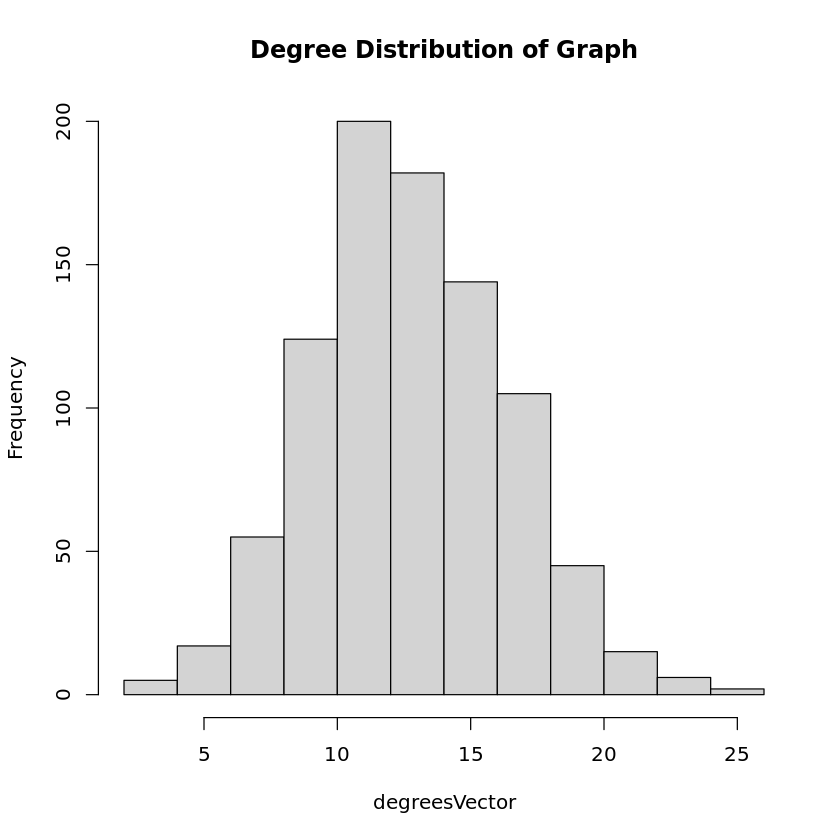

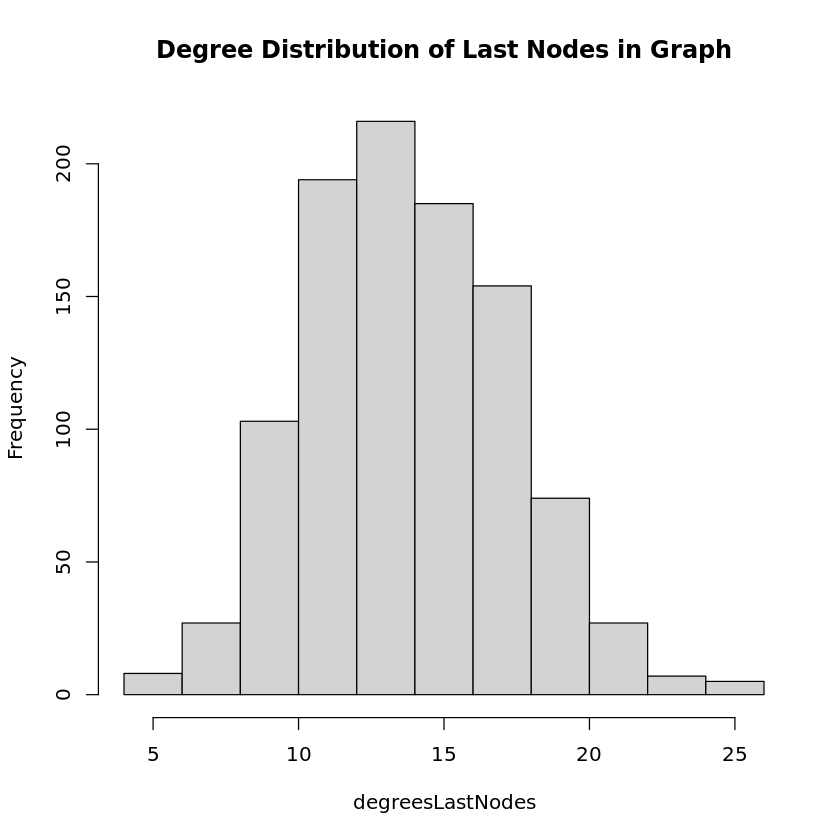

In [23]:
degreesVector <- degree(g)
hist(degreesVector, main='Degree Distribution of Graph')

degreesLastNodes <- degree(g, last_nodes)
hist(degreesLastNodes, main='Degree Distribution of Last Nodes in Graph')

d) Repeat 1(b) for undirected random networks with 9000 nodes. Compare the results and explain qualitatively. Does the diameter of the netwrok play a role?

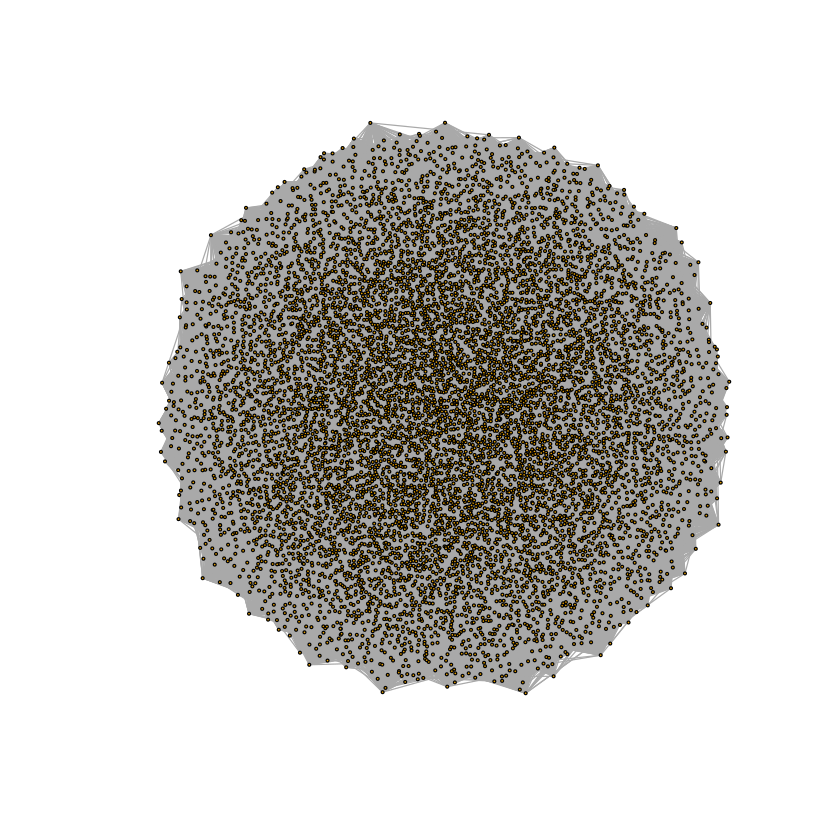

In [24]:
# number of nodes
n <- 9000
# Probability of edge creation
p <- 0.015
# Generate the random graph
g <- erdos.renyi.game(n, p, type="gnp", directed=FALSE)
# Plot the graph
plot(g, vertex.size=1, vertex.label=NA)

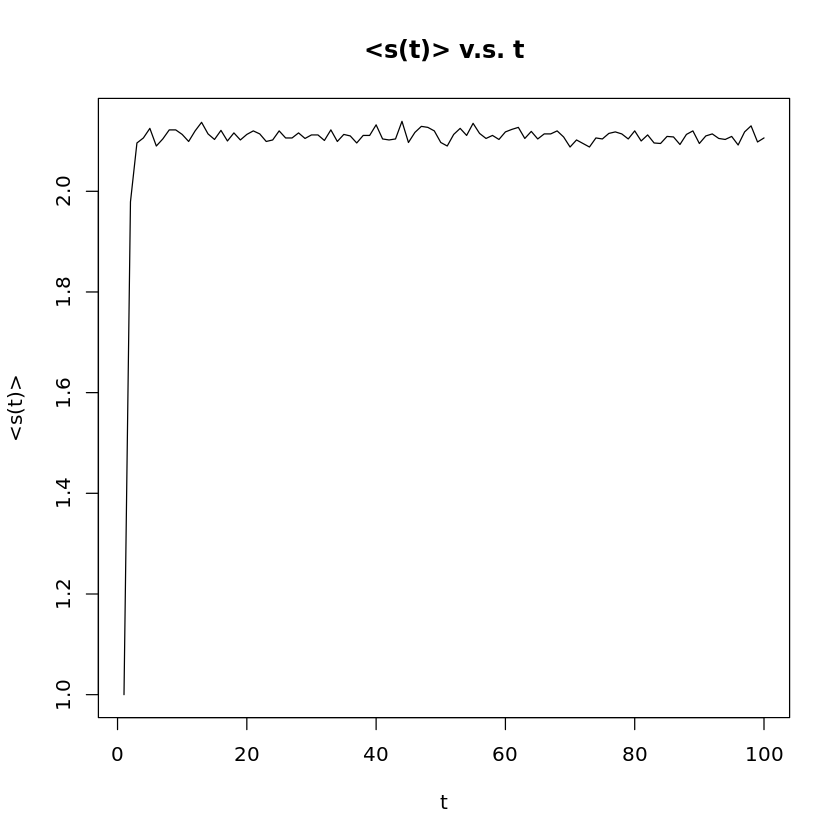

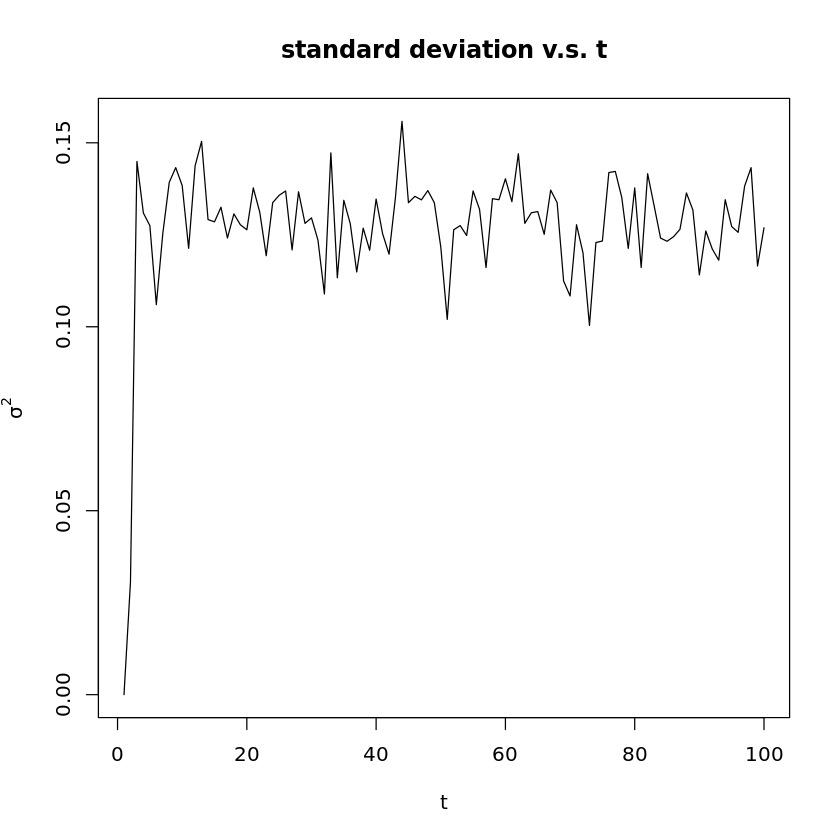

In [25]:
last_nodes = plotgraph_with_lastnodes(g)

### 2. Random walk on networks with fat-tailed degree distribution

a) Generate an undirected preferential attachment networks with 900 nodes, where each new node attaches to $m=1$ old nodes.

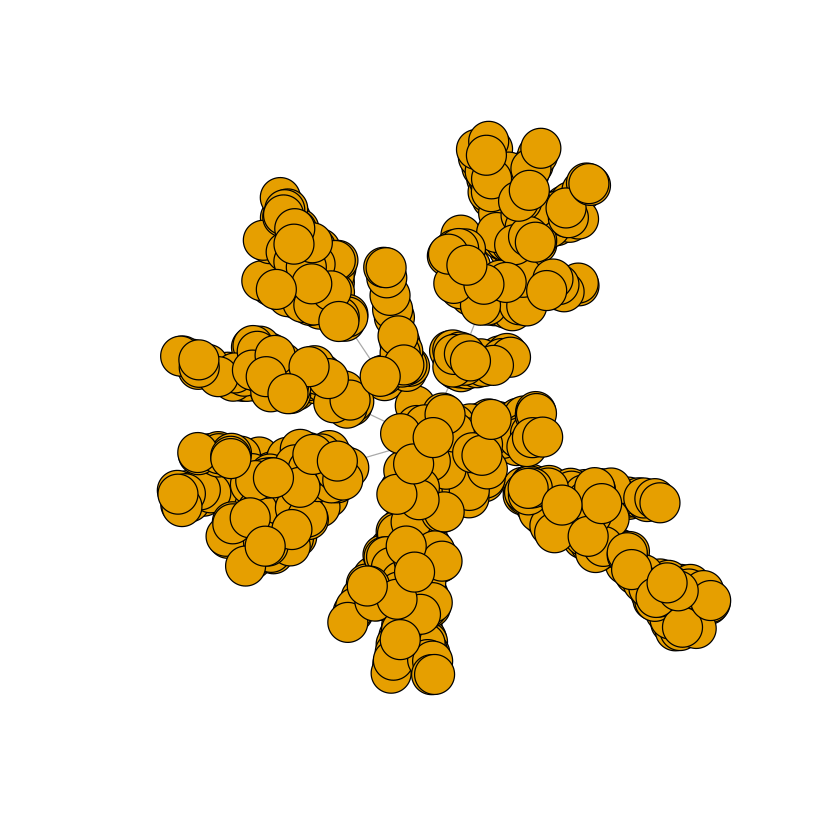

In [26]:
n <- 900
m <- 1

g <- barabasi.game(n, m, directed=FALSE)

plot(g, vertex_size=5, vertex.label=NA)

b) Let a random walker start from a randomly selected node. Measure and plot $<s(t)>$ v.s. $t$ and $\sigma^2(t)$ v.s. $t$.

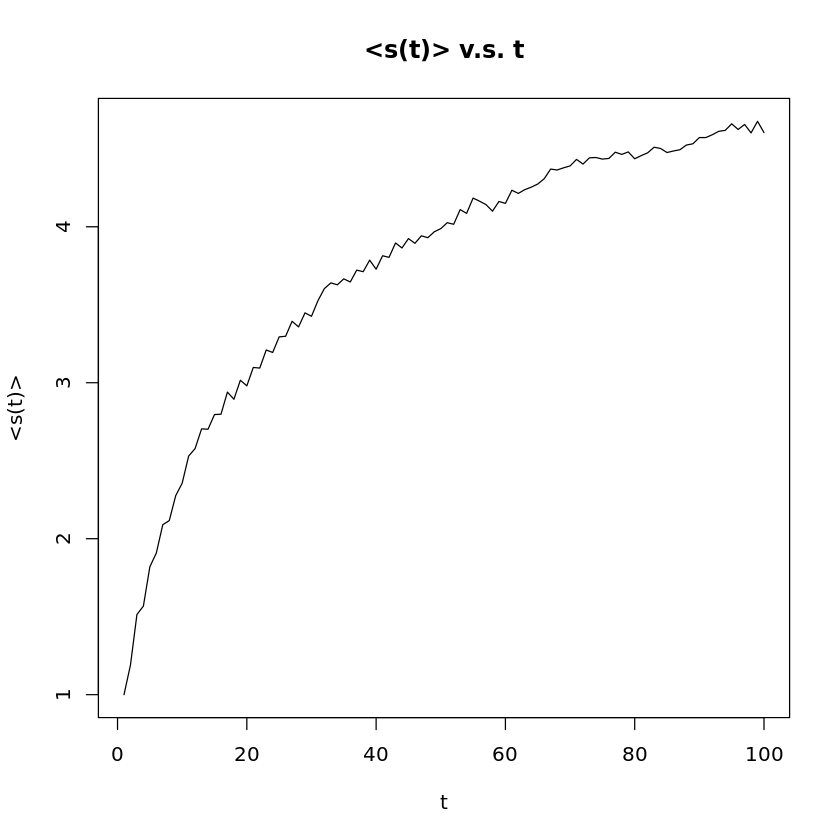

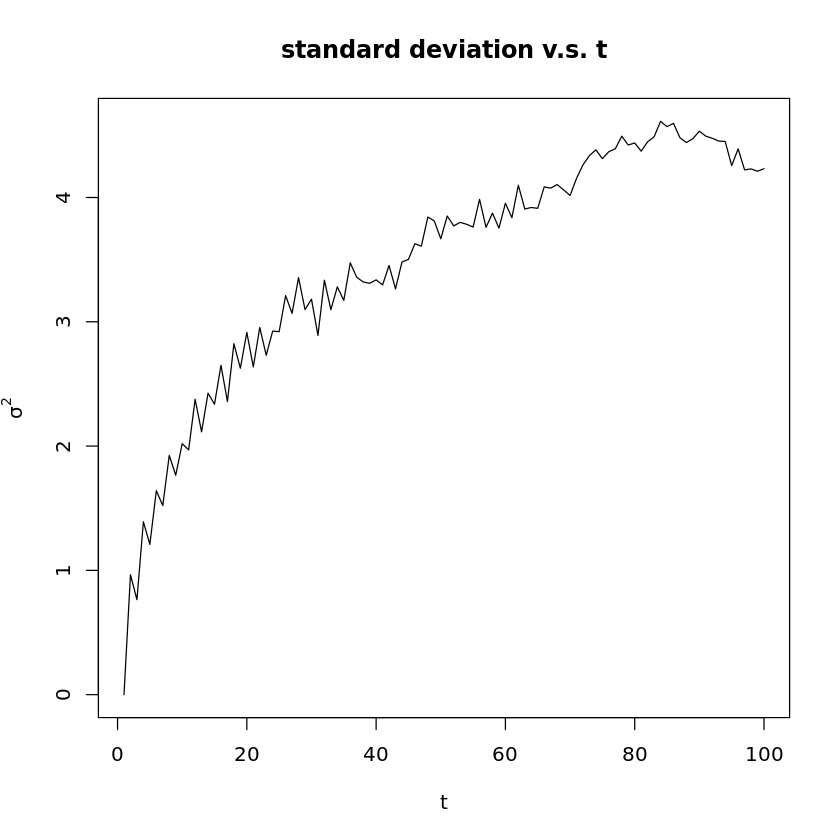

In [27]:
last_nodes = plotgraph_with_lastnodes(g)

c) Measure the degree distribution of the nodes reached at the end of the random walk on this network. How does it compare with the degree distribution of the graph?

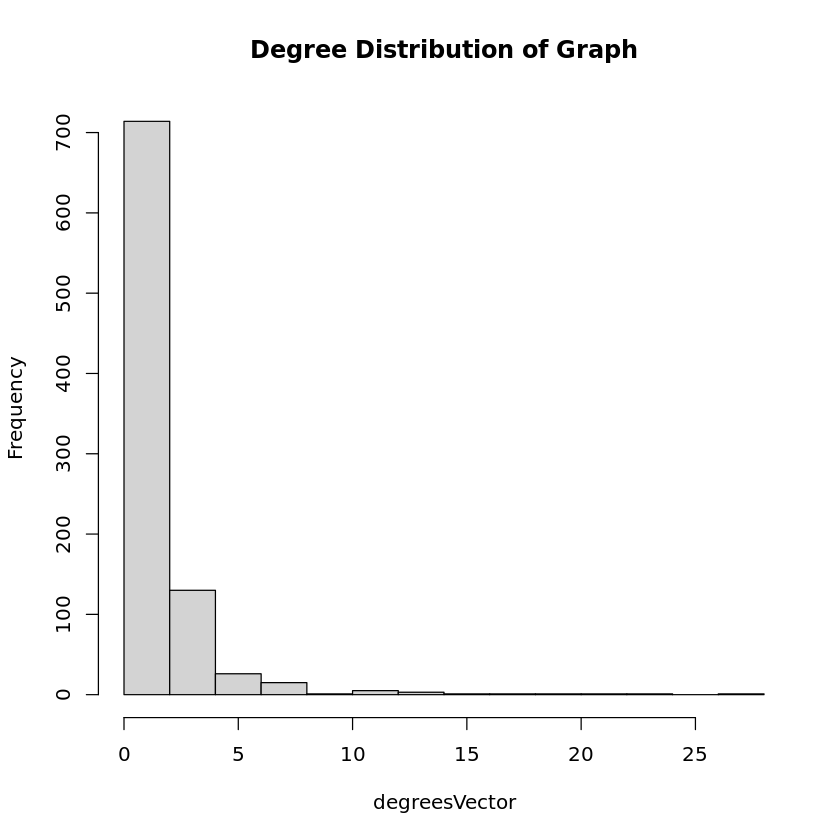

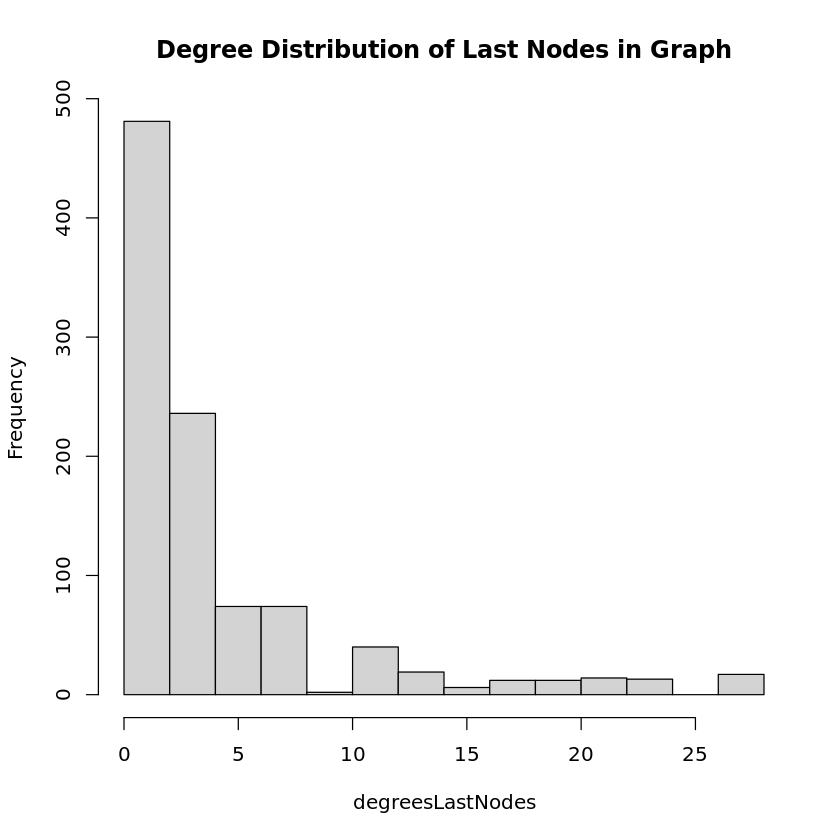

In [28]:
degreesVector <- degree(g)
hist(degreesVector, main='Degree Distribution of Graph')

degreesLastNodes <- degree(g, last_nodes)
hist(degreesLastNodes, main='Degree Distribution of Last Nodes in Graph')

d) Repeat 2(b) for preferential attachment networks with 90 and 9000 nodes, and $m=1$. Comapre the results and explaint qualitatively. Does the diameter of the netwrok play a role?

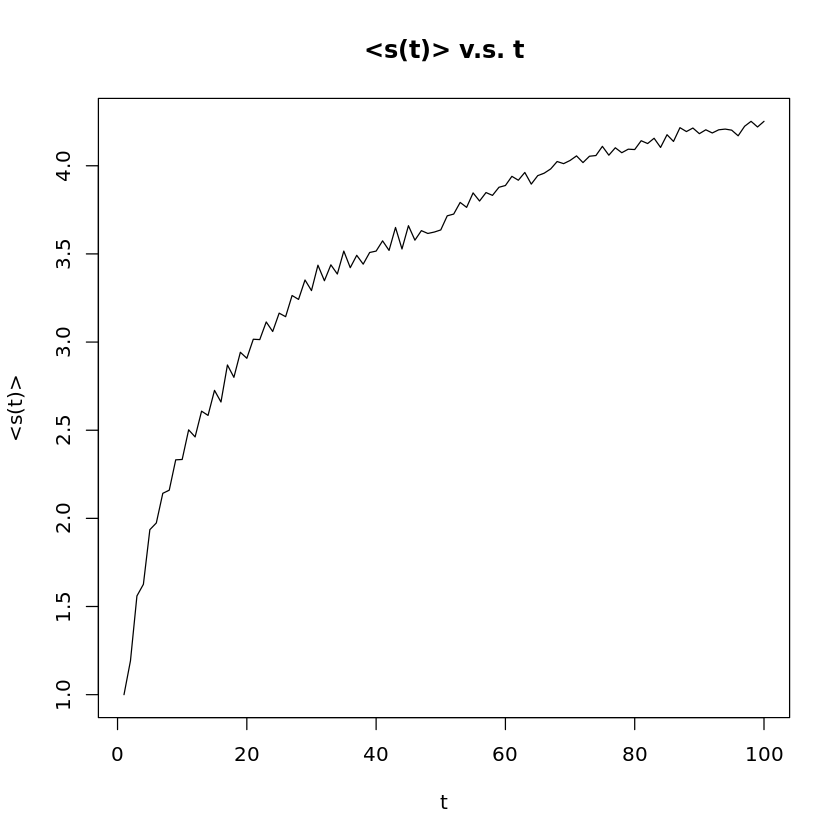

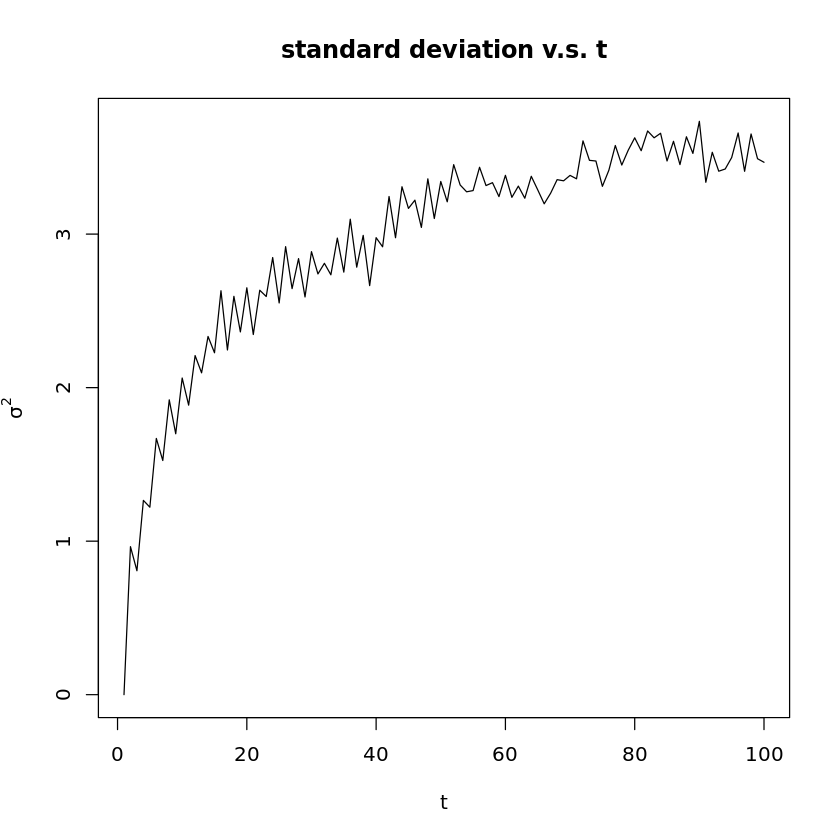

In [29]:
n <- 90
m <- 1

g <- barabasi.game(n, m, directed=FALSE)
last_nodes = plotgraph_with_lastnodes(g)

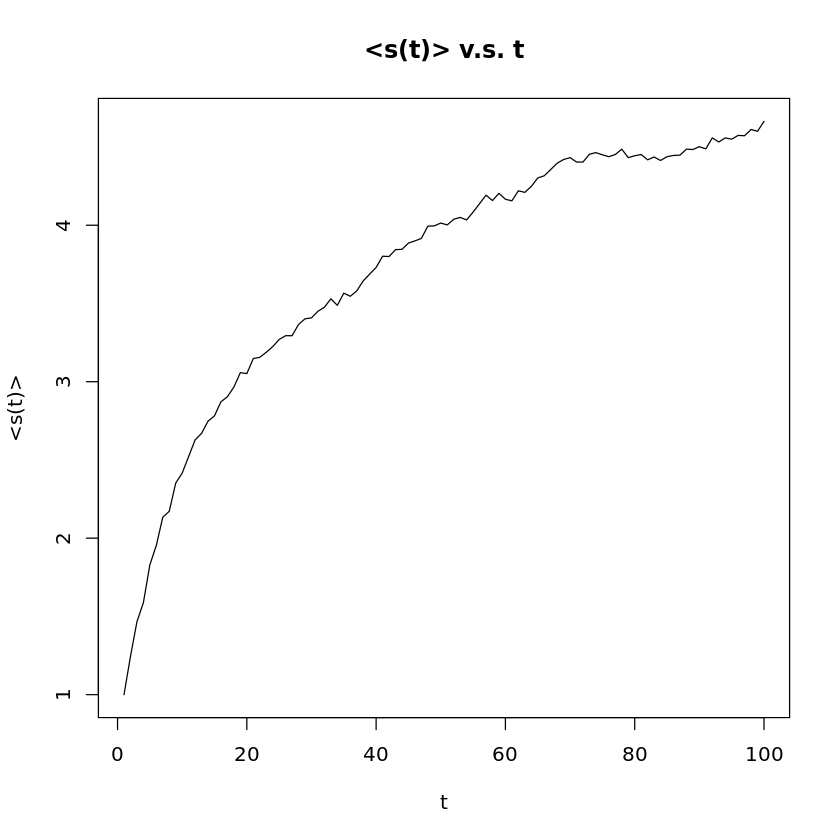

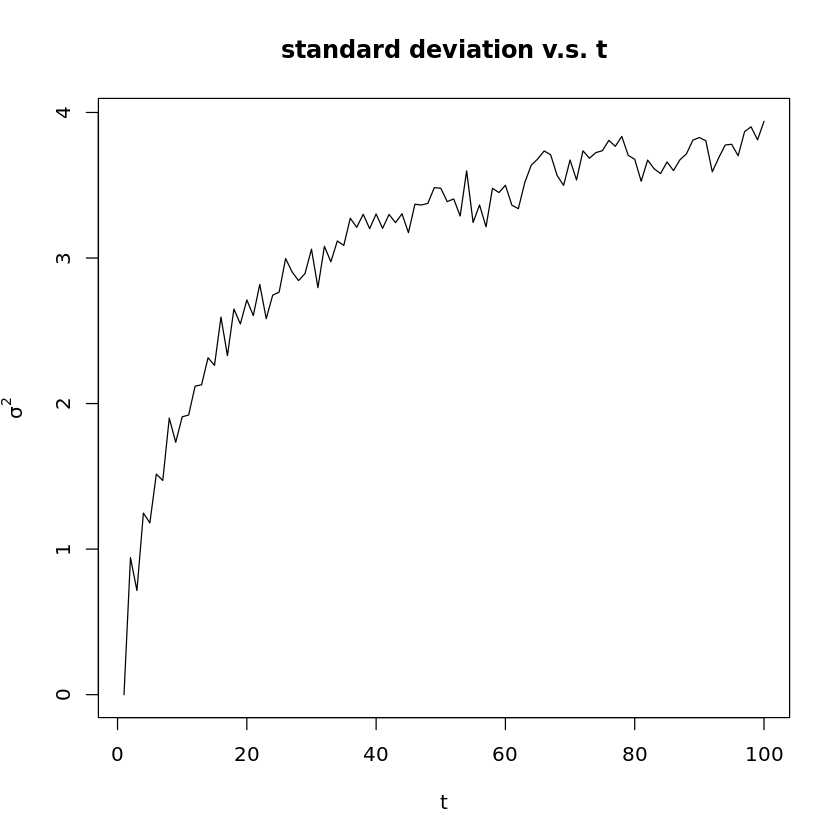

In [30]:
n <- 900
m <- 1
g <- barabasi.game(n,m, directed=FALSE)
last_nodes = plotgraph_with_lastnodes(g)

### Page Rank
The PageRank Algorithm, as used by the Google search engine, exploits the linkage structure of the web to compute global "importance" scores that can be used to influence the rankgin of search results. Here, we use random walk to simulate PageRank.

a) We are going to create a directed random network with 900 nodes, using the preferential attachment model. Note that in a directed preferntial attachment network, the out-degree of every node is $m$, while the in-degrees follow a power law distribution. One problem of performing random walk in such network is that, the very first node will have no outbounding edges, and be a "black hole" which a random walker can never "escape" from. To address that, let's generate another 900-node ranodm netwrok with preferntial attachment model, and merge the two networks by adding the edges of the second graph to the first graph with a shuffling of indices of the nodes. Create such a network using $m=4$. Measure the probability that the walker visits each node. Is this probability related to the degree of nodes?

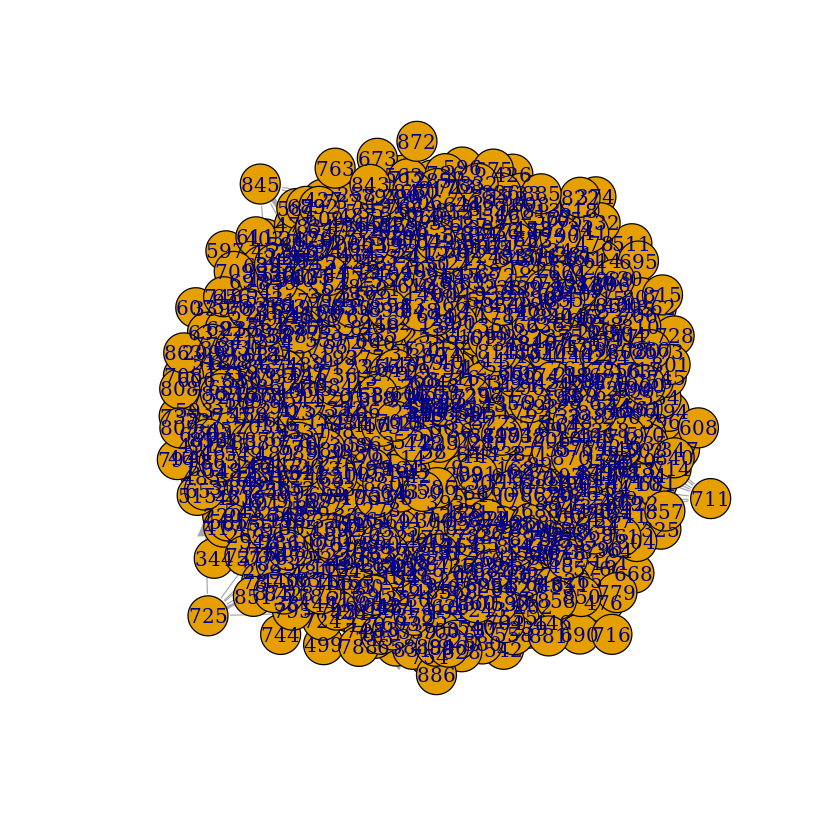

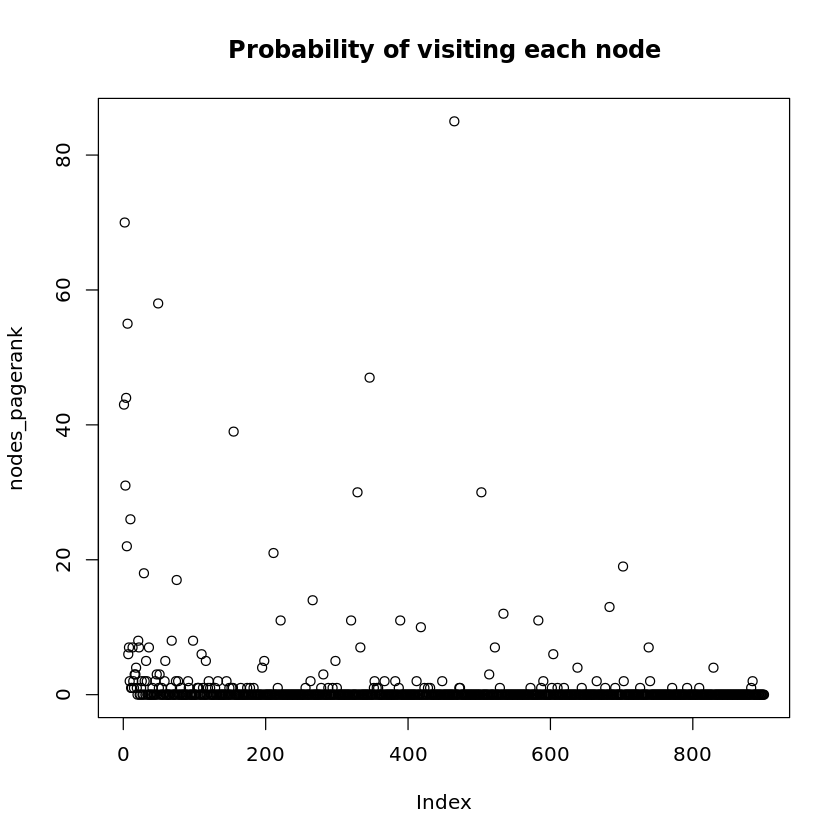

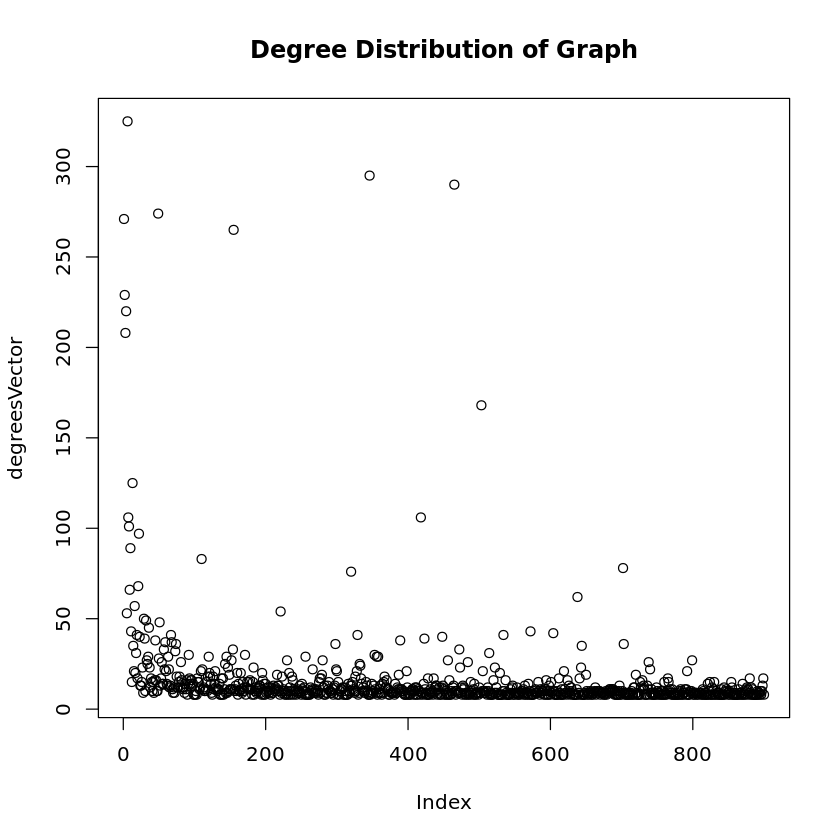

In [31]:
g1 <- sample_pa(n=900, m=4, directed=TRUE)
g2 <- sample_pa(n=900, m=4, directed=TRUE)
g2p <- permute(g2, sample(vcount(g2)))
g11 = add_edges(g1, c(t(as_edgelist(g2p))))
plot(g11)
steps <- 100
times <- 1000
tm <- create_transition_matrix(g11)
nodes_pagerank <- rep(0, 900)
for(i in 1:times) {
    start = sample(1:vcount(g11),1)
    row_nodes = random_walk(g11, steps, start, tm)
    nodes_pagerank[row_nodes[steps]] = nodes_pagerank[row_nodes[steps]] + 1 
}
plot(nodes_pagerank, main="Probability of visiting each node")

degreesVector <- degree(g11, mode='all')
plot(degreesVector, main='Degree Distribution of Graph')

b) In all previous questions, we didn't have any teleportation. Now, we use a teleportation probability of $\alpha=0.2$ (teleport out of a node with prob=0.2 instead of oging to its neighbor). By performing random walks on the network created in 3(a), measure the probability that the walkser visit each node. How is this probability related to the degree of the ndoe and $\alpha$.

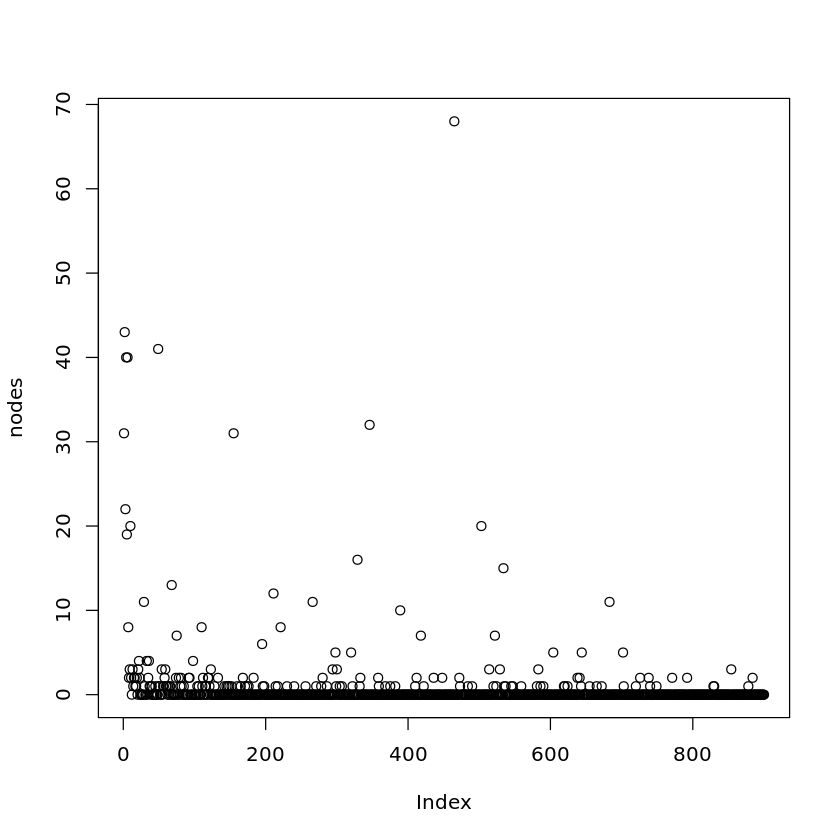

In [32]:
random_walk_with_teleport = function(g, num_steps, start_node, transition_matrix=NULL, probability=NULL) {
    if(is.null(transition_matrix)){
        transition_matrix = create_transition_matrix(g)
    }
    if (is.null(probability)) {
        probability = rep(1/vcount(g), vcount(g))
    }

    row_nodes = numeric(length=num_steps)
    v = start_node
    for(i in 1:num_steps) {
        PMF = transition_matrix[v,]
        v1 = sample(1:vcount(g), 1, prob=probability)
        v2 = sample(1:vcount(g), 1, prob=PMF)
        random = sample(1:100, 1)
        if (random <= 20 || degree(g, v, mode="out") == 0){
            v = v1
        }else{
            v = v2
            row_nodes[i] = v
        }
    }
    return(row_nodes)
}

nodes = rep(0, 900)
for (i in 1:times){
    start = sample(1:vcount(g11), 1)
    row_nodes = random_walk_with_teleport(g11, steps, start, tm)
    nodes[row_nodes[steps]] = nodes[row_nodes[steps]] + 1
}
plot(nodes)

### Personalized PageRank
While the use of PageRank ahs proven very effective, the web's rapid growth imn size and diversity drives an increasing demand for greater flexibility in ranking. Ideally, each user should be able to define their own notion of importance for each individual query.

a) Suppose you avhe your own notion of importance. Your interest in a node is proportional to the node's PageRank, because you totally rely upon Google to decide which website to visit (assume that these nodes represent websites). Again, use random walk on network generated in question 3 to simuiatle this personalized PageRank. Here the teleportation prbability to each node is proportinoal to its PageRank (as oppsed to the regular PageRank, where at teleportation, the chance of visiting all nodes are the same and equal to $\frac{1}{N}$). Again, let the teleportation probability be euqal to $\alpha=0.2$. Compare the results with 3(a).

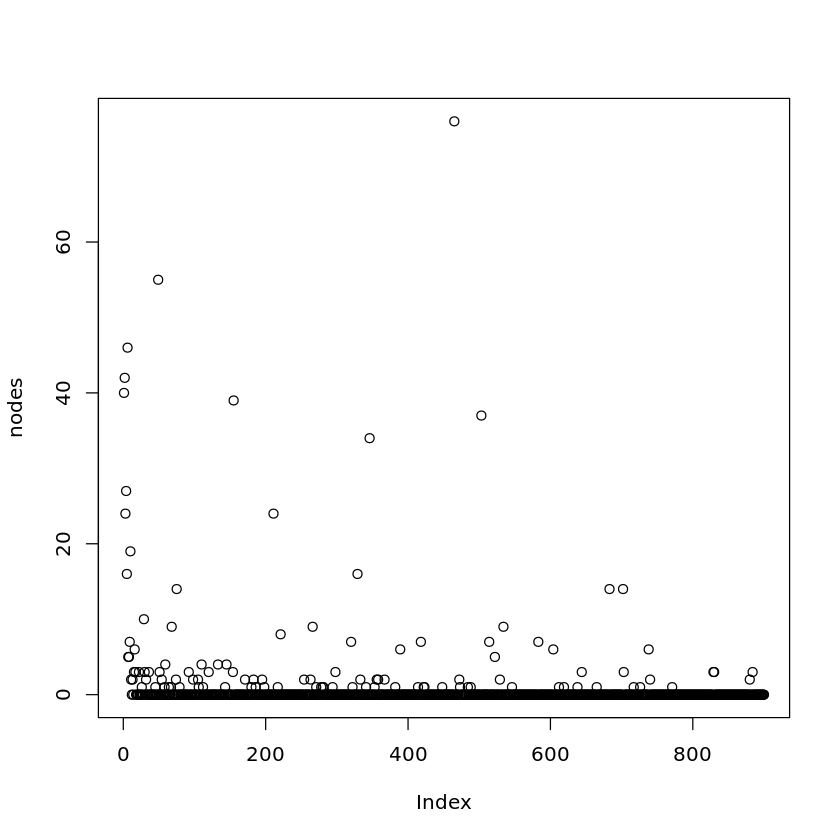

In [33]:
nodes = rep(0, 900)
for(i in 1:times){
    start = sample(1:vcount(g11), 1)
    row_nodes = random_walk_with_teleport(g11, steps, start, tm, nodes_pagerank)
    nodes[row_nodes[steps]] = nodes[row_nodes[steps]] + 1
}
plot(nodes)

b) Find two nodes in the network with median PageRanks. Repeat part 4(a) if teleportations land only on those two nodes (with probabilitives 1/2, 1/2). How are the PageRank values affected?

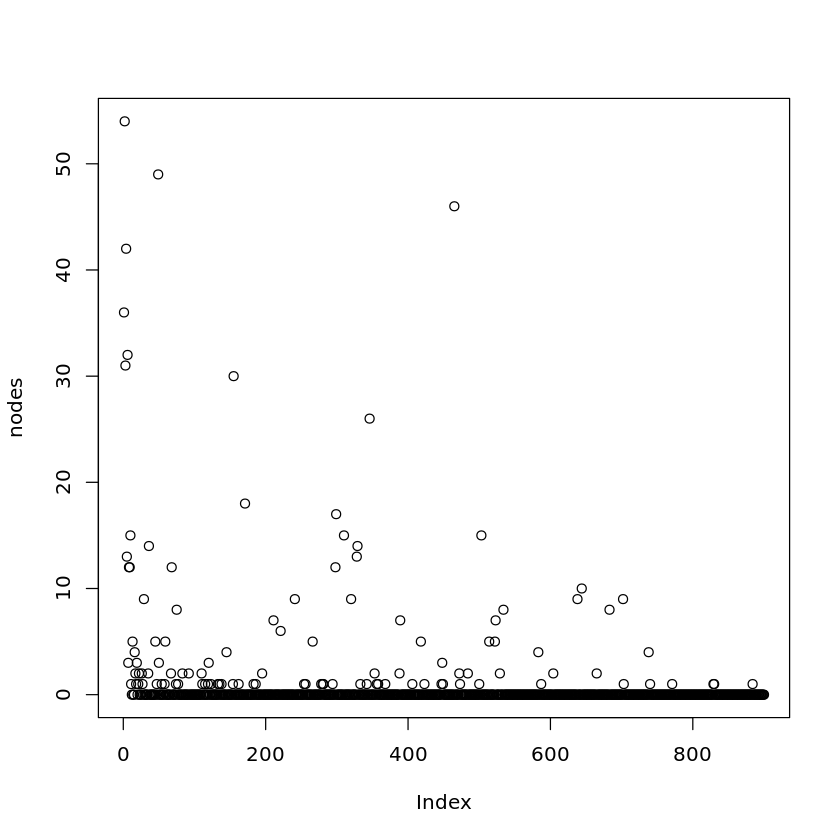

In [34]:
ix <- sort(nodes_pagerank, index.return=TRUE)[2]$ix
median_nodes1 = ix[times/2]
median_nodes2 = ix[times/2+1]
nodes_with_median_prob = rep(0, 900)
nodes_with_median_prob[median_nodes1] = 1/2
nodes_with_median_prob[median_nodes2] = 1/2
nodes = rep(0,900)
for(i in 1:times){
    start = sample(1:vcount(g11),1)
    row_nodes = random_walk_with_teleport(g11, steps, start, tm, nodes_with_median_prob)
    nodes[row_nodes[steps]] = nodes[row_nodes[steps]] + 1
}
plot(nodes)

c) More or less, 4(b) is what happens in the real world, in that a user browsing the web only teleports to a set of trusted web pages. However, this is againts the assumption of normal PageRank, where we assume that people's interest in all nodes are the same. Can you take into account the effect of this self-reinforcement and adjust the PageRank equation?

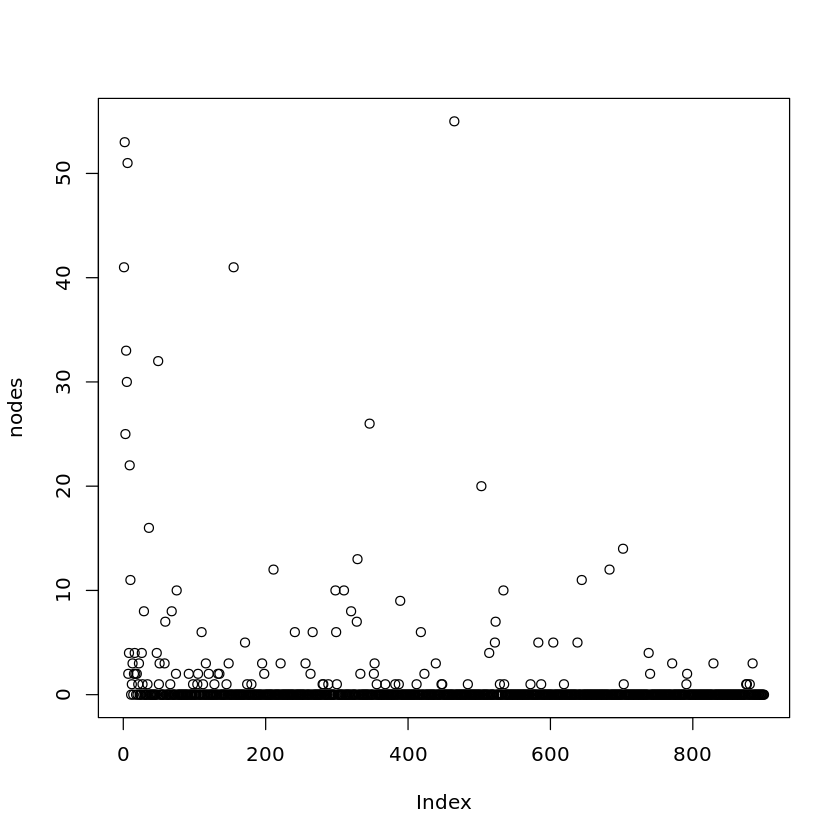

In [35]:
nodes = rep(0, 900)
beta = 0.8
combine_prob = nodes_pagerank * (1-beta) / 900
combine_prob[median_nodes1] = combine_prob[median_nodes1] + beta/2
combine_prob[median_nodes2] = combine_prob[median_nodes2] + beta/2
for (i in 1:times){
    start = sample(1:vcount(g11),1)
    row_nodes = random_walk_with_teleport(g11, steps, start, tm, combine_prob)
    nodes[row_nodes[steps]] = nodes[row_nodes[steps]] + 1
}
plot(nodes)